# Time Series  Forecast Overview

Main goal of this notebook is to explore different approaches to time series forecast, starting from the easier toward the most complicated one like state of the art neural network sequences modeling

In order to compare different techniques in a meaningful way we try to make the same kind of prediction using the well known power electricity data of the Filippetti IoT demo

Before the comparison we present a brief summary of the main terminology and best practices for time series problems

### Simple explanations and main considerations about time series

1. Inputs vs. Outputs

> __Inputs__: Historical data provided to the model in order to make a single forecast.<br>
> __Outputs__: Prediction or forecast for a future time step beyond the data provided as input.

2. Endogenous vs. Exogenous

> __Endogenous__: Input variables that are influenced by other variables in the system and on which the output variable depends.<br>
> __Exogenous__: Input variables that are not influenced by other variables in the system and on which the output variable depends.

3. Regression vs. Classification

> __Regression__: Forecast a numerical quantity.<br>
> __Classification__: Classify as one of two or more labels.

4. Unstructured vs. Structured

> __Unstructured__: No obvious systematic time-dependent pattern in a time series variable.<br>
> __Structured__: Systematic time-dependent patterns in a time series variable (e.g. trend and/or seasonality).

5. Univariate vs. Multivariate

> __Univariate__: One variable measured over time.<br>
> __Multivariate__: Multiple variables measured over time.

6. Single-step vs. Multi-step

> __One-Step__: Forecast the next time step.<br>
> __Multi-Step__: Forecast more than one future time steps.

7. Static vs. Dynamic

> __Static__: A forecast model is fit once and used to make predictions.<br>
> __Dynamic__: A forecast model is fit on newly available data prior to each prediction.

8. Contiguous vs. Discontiguous

> __Contiguous__: Observations are made uniform over time.<br>
> __Discontiguous__: Observations are not uniform over time.

### List of basic models that could be applied in increasing order of complexity

* __Baseline__
    * Persistence (grid search the lag observation that is persisted)
    * Rolling moving average
    * …
* __Autoregression__ `(add a V at the beginning for multivariate equivalent)`
    * ARMA for stationary data
    * ARIMA for data with a trend
    * SARIMA for data with seasonality
    * …
* __Exponential Smoothing__
    * Simple Smoothing
    * Holt Winters Smoothing
    * …
* __Linear Machine Learning__
    * Linear Regression
    * Ridge Regression
    * Lasso Regression
    * Elastic Net Regression
    * …
* __Nonlinear Machine Learning__
    * k-Nearest Neighbors
    * Classification and Regression Trees
    * Support Vector Regression
    * …
* __Ensemble Machine Learning__
    * Bagging
    * Boosting
    * Random Forest
    * Gradient Boosting
    * …
* __Deep Learning__
    * MLP
    * CNN
    * LSTM
    * Hybrids
    * …

### Strategies

#### __1. Strategy for Exploration and Exploitation__

I would recommend two different approaches that should be used in tandem:

> __Diagnostics__: Diagnostics involve performing a run with one set of hyperparameters and producing a trace of the model skill on the training and test dataset each training epoch <br>
> __Grid Search__: Based on learnings from diagnostic results, the grid search provides a sweep across a suite of values for specific model hyperparameters such as the number of neurons, batch size, and so on

I would strongly encourage you to test every assumption you have about the model. This includes simple things like data scaling, weight initialization, and even the choice of activation function, loss function, and more.

#### __2. Strategy for Handling Data Size__

I recommend a strategy of working with smaller samples of data first to test ideas and slowly increasing the amount of data to see if things learned on the small samples hold on larger samples.

> _1 week sample_ <br>
> _1 month sample_ <br>
> _1 year sample_ <br>
> _all data_ <br>

The benefit of this approach is that you can very quickly test ideas, in minutes, with multiple repeats (e.g. statistically significant) and then later scale up only those promising ideas to more and more data.

#### __3. Strategy for Model Complexity__

We can scale the complexity of the problem and see what works at one level of complexity (e.g. univariate inputs) holds at more complex levels of complexity (multivariate inputs).

> _Univariate input, single-step output_ <br>
> _Univariate input, multi-step output_ <br>
> _Multivariate inputs, single-step output_ <br>
> _Multivariate inputs, multi-step output_ <br>

At each step, the objective is to demonstrate that the addition of complexity can lift the skill of the model.

> _Can a neural network model outperform a persistence forecast model?_ <br>
> _Can a neural network model outperform a linear forecast model?_ <br>
> _Can exogenous input variables lift the skill of the model over a univariate input?_ <br>
> _Can a direct a multi-step forecast be more skillful than a recursive single-step forecast?_ <br>

This same approach can be used when working with more sophisticated neural network models like LSTMs.

> _Model the problem as a mapping of inputs to outputs (e.g. no internal state or BPTT)_ <br>
> _Model the problem as a mapping problem with internal state across input sequences only (no BPTT)_ <br>
> _Model the problem as a mapping problem with internal state and BPTT_ <br>

At each step, the increased model complexity must demonstrate skill at or above the prior level of complexity. Said another way, the added model complexity must be justified by a commensurate increase in model skill or capability.

> _Can an LSTM outperform an MLP with a window?_ <br>
> _Can an LSTM with internal state and no BPTT outperform an LSTM where the state is reset after each sample?_ <br>
> _Can an LSTM with BPTT over input sequences outperform an LSTM that is updated after each time step?_ <br>

### Multi-Step Forecasting

__1. Direct Multi-step Forecast Strategy__

The direct method involves developing a separate model for each forecast time step.

Because separate models are used, it means that there is no opportunity to model the dependencies between the predictions, such as the prediction on day 2 being dependent on the prediction in day 1, as is often the case in time series.

__2. Recursive Multi-step Forecast__

The recursive strategy involves using a one-step model multiple times where the prediction for the prior time step is used as an input for making a prediction on the following time step.

Because predictions are used in place of observations, the recursive strategy allows prediction errors to accumulate such that performance can quickly degrade as the prediction time horizon increases.

__3. Direct-Recursive Hybrid Strategies__

The direct and recursive strategies can be combined to offer the benefits of both methods.

For example, a separate model can be constructed for each time step to be predicted, but each model may use the predictions made by models at prior time steps as input values.

__4. Multiple Output Strategy__

The multiple output strategy involves developing one model that is capable of predicting the entire forecast sequence in a one-shot manner.

Multiple output models are more complex as they can learn the dependence structure between inputs and outputs as well as between outputs.

# Raw Data Loading

#### load basic libraries and some config

basic libraries for plotting and data mining

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import pickle
from datetime import timedelta

import os

from sklearn.metrics import r2_score

In [3]:
import warnings
warnings.simplefilter(action='ignore')

In [4]:
# plot interattivi con plotly
# import plotly.offline as py
# import plotly.graph_objs as go

# py.init_notebook_mode()

In [5]:
plt.rcParams['figure.figsize'] = (8.0, 5.0)
sns.set()

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}

#### load raw historical data for power electricity consumption of the ground floor of Filippetti headquarter in Falconara

power electricity raw data from previously deserialized csv

In [6]:
rawData=pd.read_csv('C:/Users/emanuele.pomante/Desktop/Data_Science/Filippetti/progetti_sviluppo/predictive_maintenance/prototipo_sensore_predittivo/notebooks/deserialized_data/power_electricity_raw_123104256.csv')
rawData.tz = pd.to_datetime(rawData.tz, utc=True)
rawData.tz = rawData.tz.dt.tz_convert(tz=None)
rawData.set_index('tz', inplace=True)
rawData.head()

,electric_power,rms_current
tz,,
2017-02-06 07:56:24.721,28.108482,147.263519
2017-02-06 07:57:56.882,26.364930,138.128852
2017-02-06 07:59:28.556,25.317777,132.642699
2017-02-06 08:03:22.759,27.208837,142.550174
2017-02-06 08:04:55.419,25.758277,134.950526


In order to ensure a uniform timescale data have been resampled at 1 hour, moreover constant value regions and outliers have also been removed

In [7]:
# drop "outliers" with a rolling statistic over a window of one day (raw sampling ~ 1 minute)
roll_avg = rawData.electric_power.rolling(1440, center=True).mean()
roll_std = rawData.electric_power.rolling(1440, center=True).std().fillna(0)
outliers = abs(rawData.electric_power-roll_avg) > (3*roll_std)
rawData.electric_power[outliers] = np.NaN

# resample at 1H to average
resampledData = rawData.resample('H', loffset='30T').mean()

# remove constant points
const_data = round(resampledData.electric_power-resampledData.electric_power.shift(1), 6) == 0
resampledData.electric_power[const_data] = np.NaN

<IPython.core.display.Javascript object>


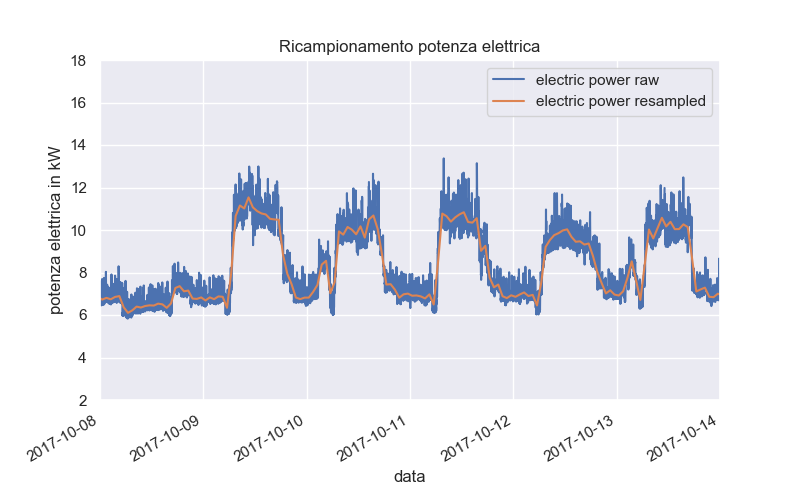

In [8]:
# plot
fig, ax = plt.subplots()

rawData.electric_power.plot(ax=ax, label='electric power raw')
resampledData.electric_power.plot(ax=ax, label='electric power resampled')

ax.set(
    xlabel='data',
    ylabel='potenza elettrica in kW',
    title='Ricampionamento potenza elettrica',
    xlim=['2017-10-08','2017-10-14'],
    ylim=[2,18]
)

ax.legend()
plt.show()

#### added multivariate data for smart building

those data have been measured in a school and could been used as a benchmark for smart building studies

In [9]:
with open("multiv_power_data", "rb") as fp:   # Unpickling
    measure_df = pickle.load(fp)

<IPython.core.display.Javascript object>


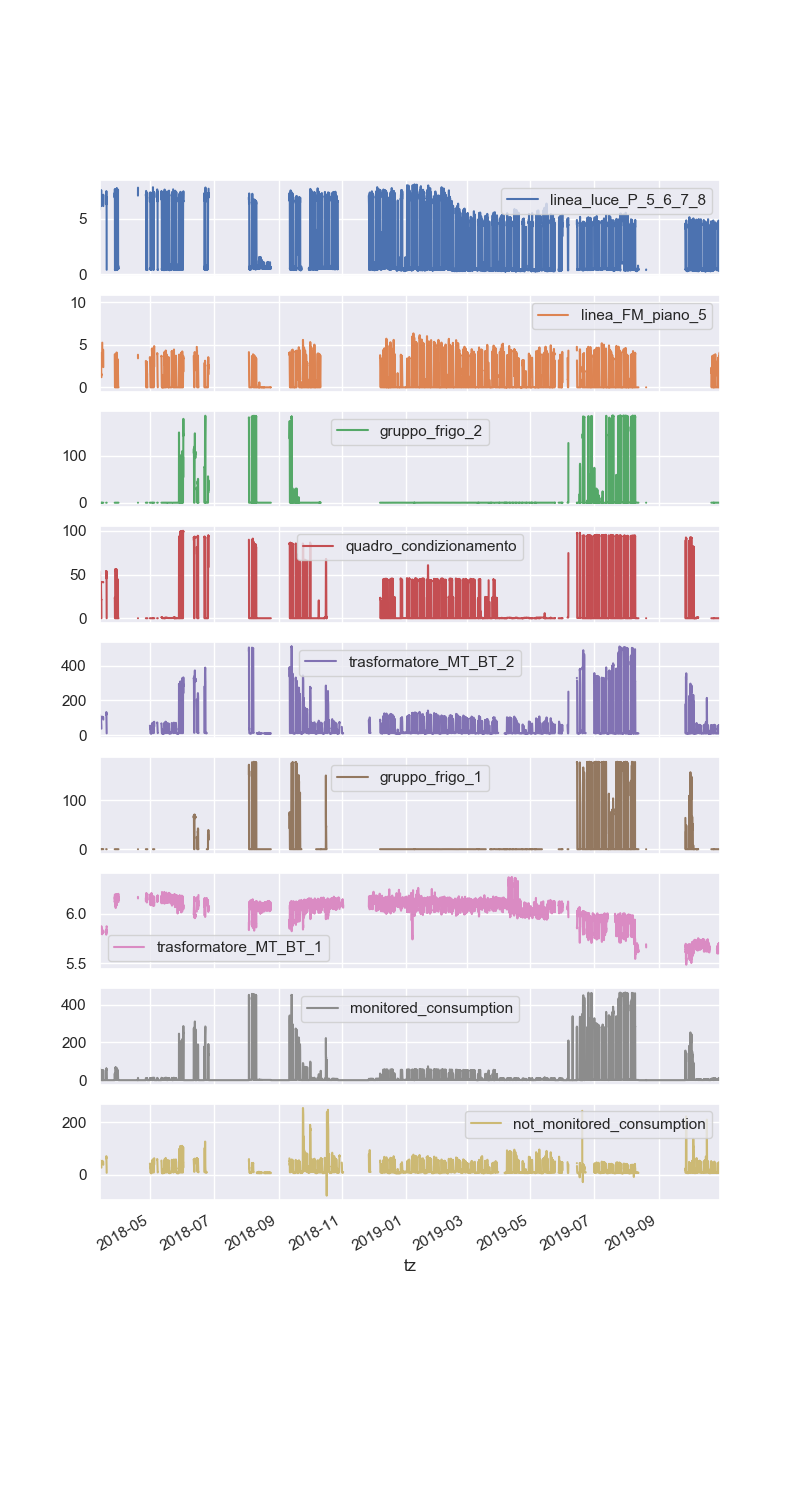

In [10]:
measure_df.plot(figsize=(8,15),subplots=True)
plt.show()

In [11]:
resampledData = measure_df.linea_FM_piano_5.tz_convert(None).to_frame()
resampledData.columns = ['electric_power']
# resampledData.index.freq = 'H'
# resampledData = resampledData.truncate(before='2018-12-08 00:00:00', after='2019-08-12 00:00:00')

<IPython.core.display.Javascript object>


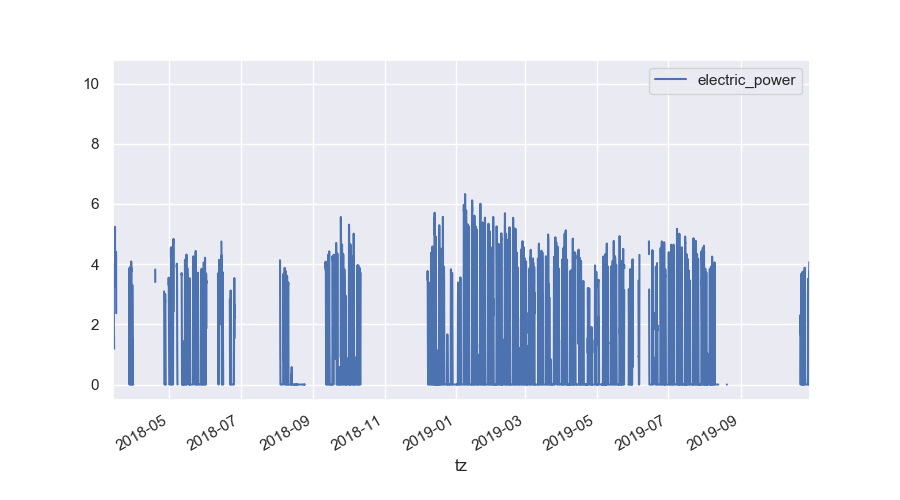

[]

In [12]:
resampledData.plot(figsize=(9,5))
plt.plot()

In [13]:
resampledData.head()

,electric_power
tz,
2018-03-13 10:30:00,3.481245
2018-03-13 11:30:00,4.041242
2018-03-13 12:30:00,4.014351
2018-03-13 13:30:00,3.838030
2018-03-13 14:30:00,3.718205


# Different time series data visualizations

In this part we want to focus on some conventional visualizations that could be useful during the EDA phase in order to better understand the data you want to model

1. stacked month visualization (groups length can be changed)

<IPython.core.display.Javascript object>


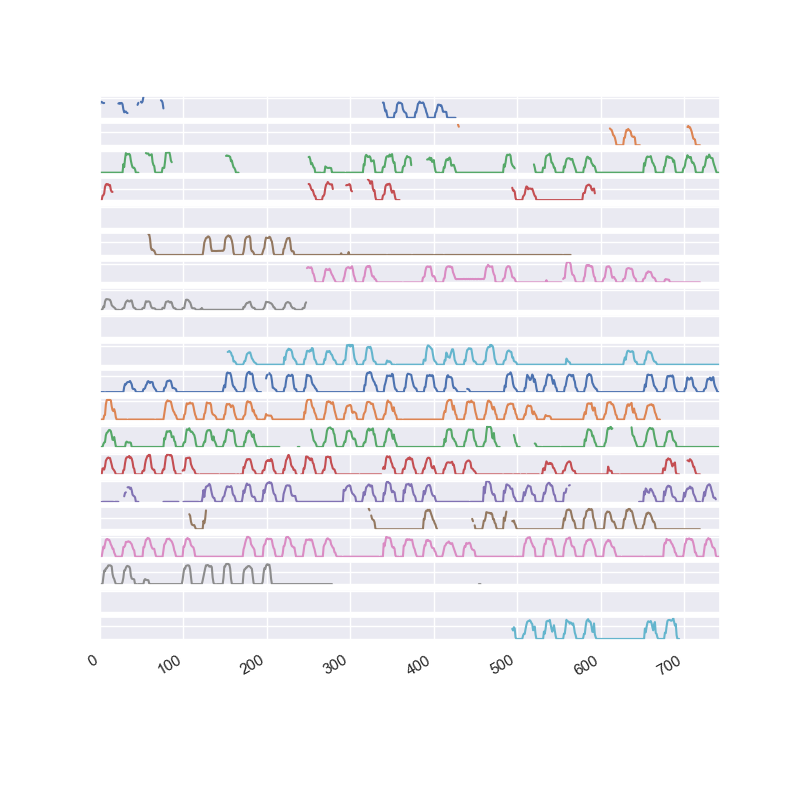

In [14]:
groups = resampledData.electric_power.groupby(pd.Grouper(freq='M'))
months = []
for name, group in groups:
    months.append(pd.Series(group.values, name=name))
months = pd.concat(months,axis=1)
axis = months.plot(subplots=True, legend=False, figsize=(8,8))
for ax in axis:
    ax.yaxis.set_ticklabels('')
plt.show()

2. simple histogram distribution of time series values

<IPython.core.display.Javascript object>


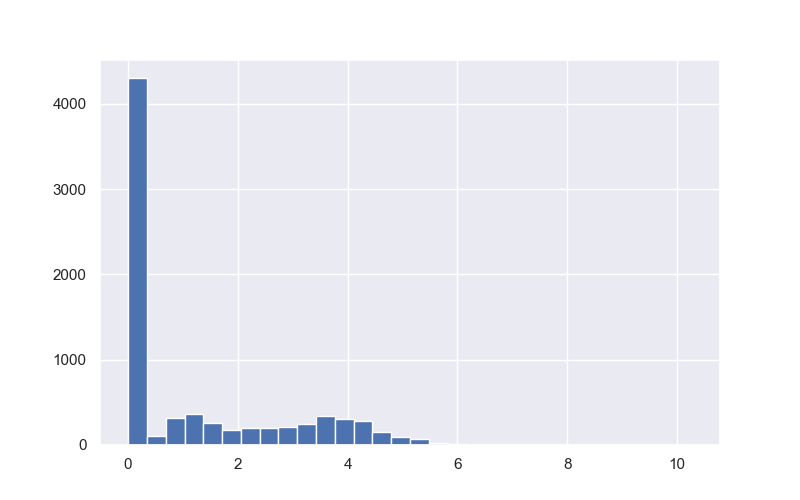

In [15]:
plt.figure()
resampledData.electric_power.hist(bins=30)
plt.show()

3. like the previous one it shows time series values density distribution (kernel density estimation plot) plot is useful to have a rapid glimpse of the average value of the timeseries

<IPython.core.display.Javascript object>


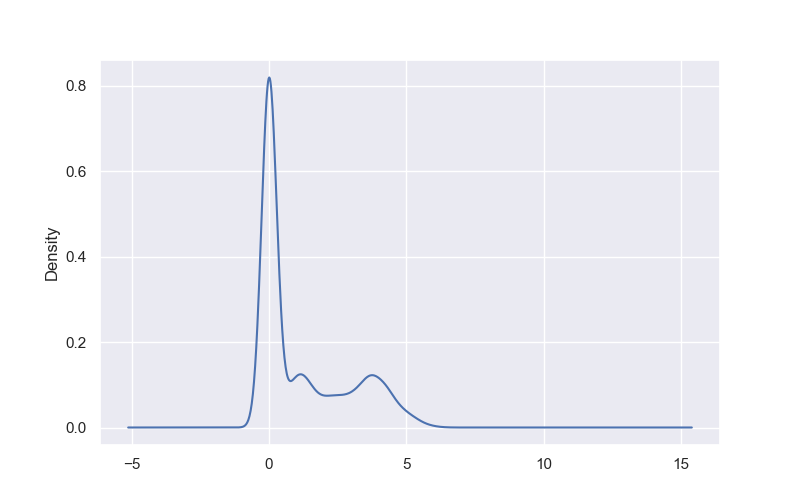

In [16]:
plt.figure()
resampledData.electric_power.plot(kind='kde')
plt.show()

4. alternatively the box-whisker plot gives you an istantaneous of values distribution in each group (in this case we have choosen months)

**_brief explanation_**

Edges of the box are the first and third quartiles then the box itself represents the IQR (interquartile range) corresponding to the central 50% of the distribution.<br>
The middle green line corresponds to the median value and the whisker bars corresponds to -1.5\*IQR and +1.5\*IQR then represent the tails of values statistical distribution.<br>
This plot is useful also to rapidly visualize outliers (represented by black circle outside the whisker bars)

<IPython.core.display.Javascript object>


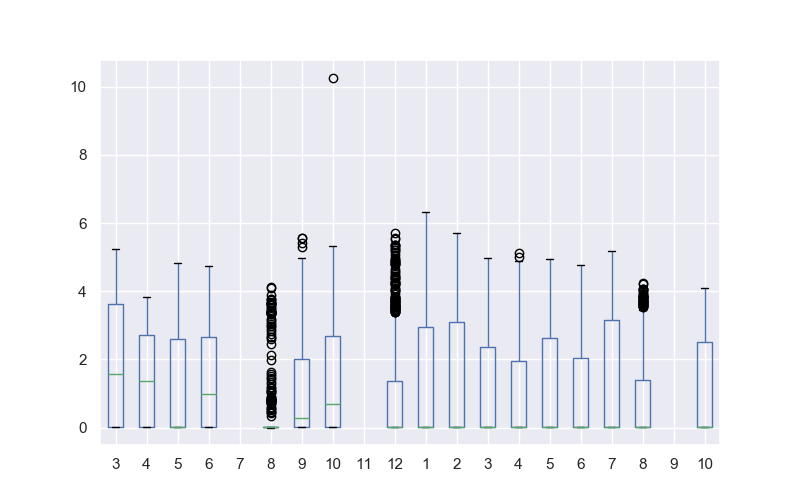

In [17]:
plt.figure()
groups = resampledData.electric_power.groupby(pd.Grouper(freq='M'))
months = []
for name, group in groups:
    months.append(pd.Series(group.values, name=name.month))
months = pd.concat(months,axis=1)
months.boxplot()
plt.show()

5. matshow command plots different groups (we always chosen months) as a value density 2D color map. Different rows represent months while colors represent value intensity (bright=higher and dark=lower) holes correspond to missing data

<IPython.core.display.Javascript object>


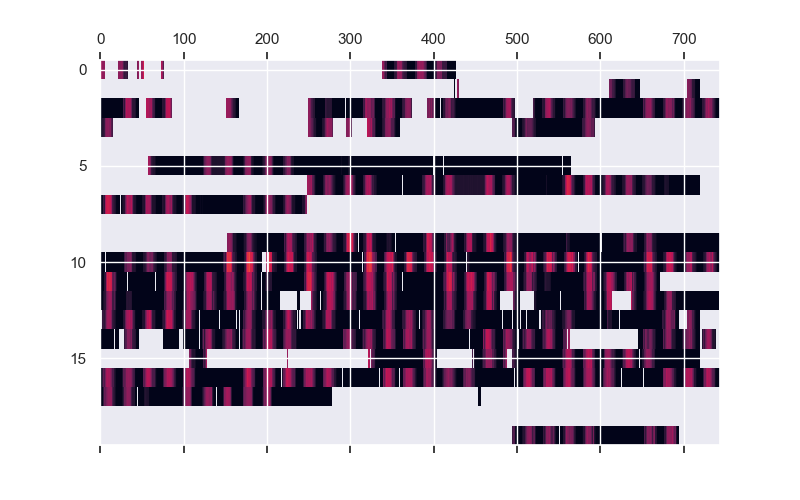

In [18]:
groups = resampledData.electric_power.groupby(pd.Grouper(freq='M'))
months = []
for name, group in groups:
    months.append(pd.Series(group.values, name=name))
months = pd.concat(months,axis=1)
months = months.T

fig, ax = plt.subplots()
ax.matshow(months, interpolation=None, aspect='auto')
plt.show()

6. the lag plot is a very simple indicator of a correlation between adjacent points of a time series, in other words a straight line indicates that values at time t-1 could be used to infer values at time t

<IPython.core.display.Javascript object>


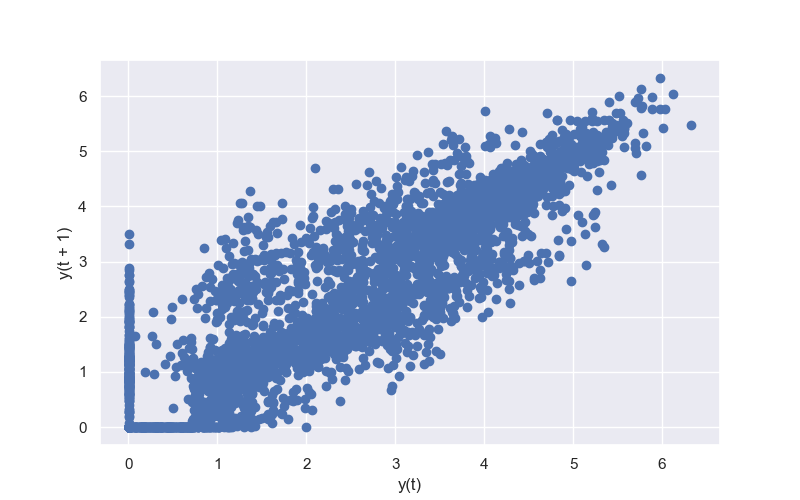

In [19]:
from pandas.plotting import lag_plot
plt.figure()
lag_plot(resampledData.electric_power, c='b')
plt.show()

7. this simple snippet produce multiple plots as before but at different lags (max 9)

<IPython.core.display.Javascript object>


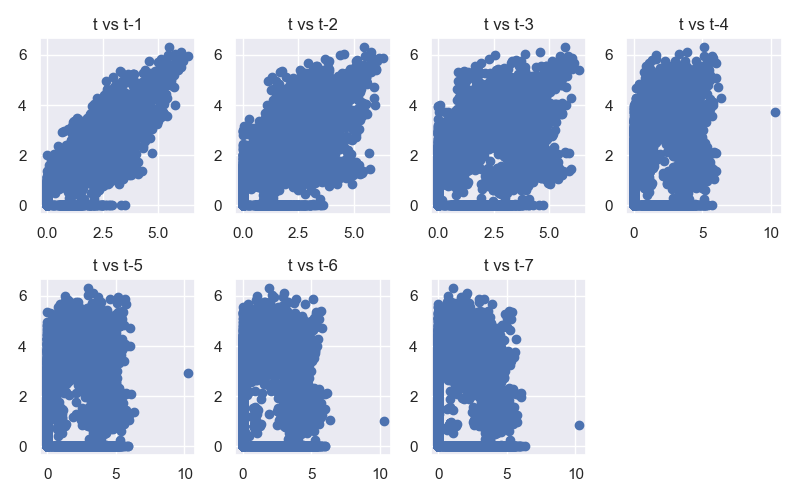

In [20]:
from pandas.plotting import scatter_matrix
values = pd.DataFrame(resampledData.electric_power.values)
lags = 7
step = 1
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i*step))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i*step))
dataframe.columns = columns
plt.figure()
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i*step))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i*step)].values)
plt.tight_layout()

8. the autocorrelation plot shows the correlation of the time series with itself for increasing lag, it is also a good indicator of periodical pattern inside the data (corresponding to peaks in the plot)

**_simple explanation_**

If we zoom the image below near the high correlation part at the beginning, we can clearly recognize daily strong periodicity corresponding to repeated peaks within 24 lag points (remember that data have been sampled at 1 hour) as well as weekly correlation peaks (168 lag points) for weekly periodicity.<br>
It is also visible the negative correlation of one year lag (lag ~ 8700)

<IPython.core.display.Javascript object>


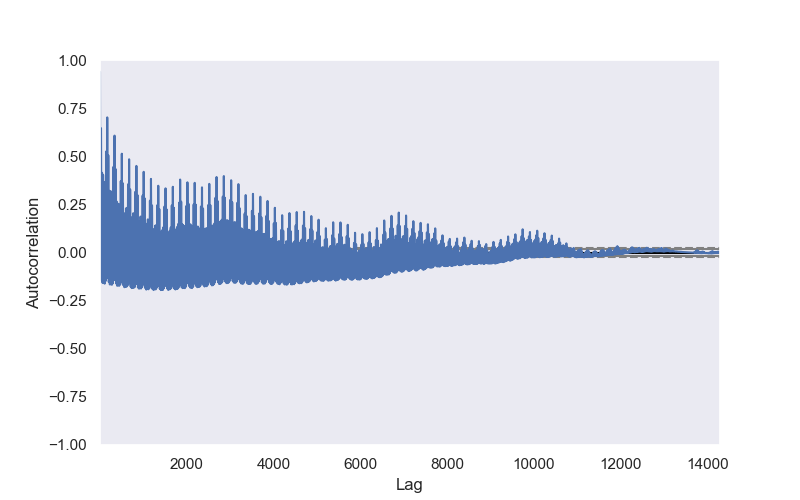

In [21]:
from pandas.plotting import autocorrelation_plot
plt.figure()
autocorrelation_plot(resampledData.electric_power.replace(np.nan,0))
plt.show()

# Normalize data

A common practice in time series analysis is to normalize data. To normalize means to rescale data such that all values lie within the range of 0 and 1


Min: 0.001513, Max: 10.268315



<IPython.core.display.Javascript object>


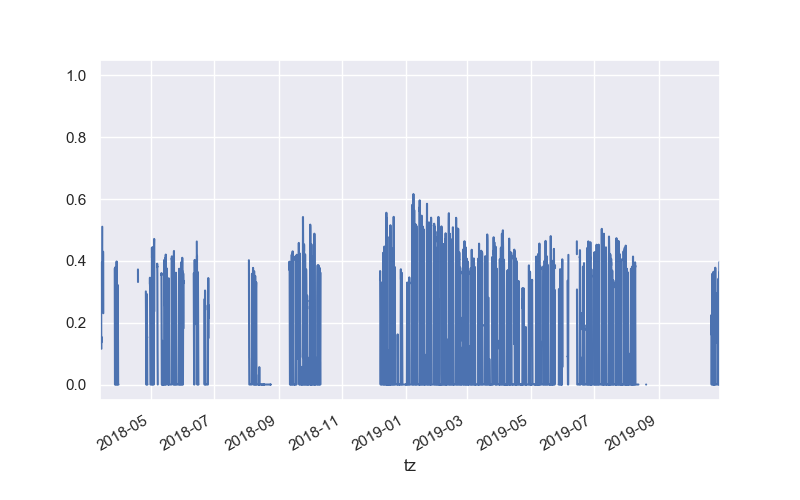

In [22]:
from sklearn.preprocessing import MinMaxScaler
# prepare data for normalization
values = resampledData.electric_power.values
values = values.reshape((len(values), 1))
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('')
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
print('')
# normalize the dataset and plot
normalized = scaler.transform(values)
normalized = pd.DataFrame(normalized[:,0], columns=['electric_power'], index=resampledData.index)
plt.figure()
normalized.electric_power.plot()
plt.show()

# Standardize data

Standardization is another common process which involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1


Mean: 1.208041, StandardDeviation: 1.637521



<IPython.core.display.Javascript object>


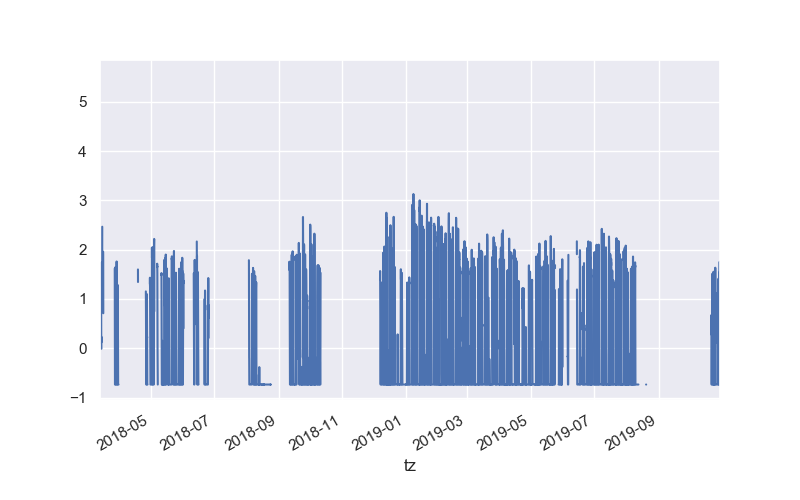

In [23]:
from sklearn.preprocessing import StandardScaler
from math import sqrt
# prepare data for standardization
values = resampledData.electric_power.values
values = values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('')
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
print('')
# standardization of the dataset and plot
standardized = scaler.transform(values)
standardized = pd.DataFrame(standardized[:,0], columns=['electric_power'], index=resampledData.index)
plt.figure()
standardized.electric_power.plot()
plt.show()

# Seasonal decomposition test

In the first test we use the "statsmodels" library to extrapolate seasonality and trend from the time series. The daily seasonality and the weekly trend are clearly visible over data

<IPython.core.display.Javascript object>


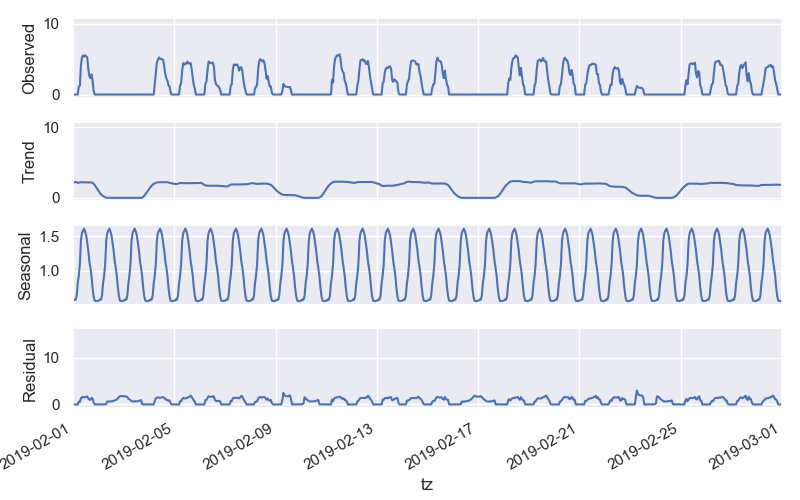

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(resampledData.electric_power.asfreq('H').ffill(), model='multiplicative')
result.plot()
# plt.xlim('2018-12-08','2019-08-12')
plt.xlim('2019-02-01','2019-03-01')
plt.show()

# Seven basic techniques for time series prediction

Since those methods cannot deal effectively with missing data/regions, as a preliminary step we select a subset of original data to discard the big holes toward January and February 2018 and the big "step" toward May 2017

Then we log transform and normalize data and to fill small region or isolated missing points we replace all Nan with the value of the week before

Then we split the subset into other two different subsets: one for the training of the algorithms and the other (smaller) one for testing of the final optimized alghoritms

<br>

_This excursus takes inspiration from AnalyticsVidhya, so if you want more details you can visit their website:_

__[7 methods to perform Time Series forecasting (with Python codes)](https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/)__

In [ ]:
# y = resampledData.truncate(before='2018-04-02', after='2018-10-29')
y = resampledData.truncate(before='2018-12-08', after='2019-08-12')
y = y[['electric_power']]

# convert to log1p
y = y.apply(lambda x: np.log1p(x))

# standardized = StandardScaler().fit(y.values).transform(y.values)
normalized = MinMaxScaler(feature_range=(0.01, 1)).fit(y.values).transform(y.values)

y = pd.Series(normalized[:,0], name='electric_power', index=y.index)

# missing values replaced with the value of the week before
for idx, value in y.iteritems():
    if np.isnan(value):
        if idx - y.idxmin() >= timedelta(days=7):
            y[idx] = y[idx-timedelta(days=7)]

y = y.to_frame()

y.fillna(0, inplace=True)

# train = y.truncate(after='2018-10-08')
# test = y.truncate(before='2018-10-08')
train = y.truncate(after='2019-07-22')
test = y.truncate(before='2019-07-22')

fig, ax = plt.subplots()
train.electric_power.plot(ax=ax, label='train')
test.electric_power.plot(ax=ax, label='test')
ax.legend()
plt.show()

1. Naive Approach

_Prediction is the last available point in the assumption that new data would not change too much in time_

In [ ]:
dd= np.asarray(train.electric_power)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
f = plt.figure()
plt.plot(train.index, train['electric_power'], label='Train')
plt.plot(test.index, test['electric_power'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
# plt.xlim('2018-09-24','2018-10-29')
plt.xlim('2019-07-08','2019-08-12')
plt.ylim(-0.5,2)
f.autofmt_xdate()
plt.show()

2. Simple Average

_Prediction is the average of the whole series (that is zero since series has been standardized)_

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['electric_power'].mean()
f = plt.figure()
plt.plot(train['electric_power'], label='Train')
plt.plot(test['electric_power'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
# plt.xlim('2018-09-24','2018-10-29')
plt.xlim('2019-07-08','2019-08-12')
plt.ylim(-0.5,2)
f.autofmt_xdate()
plt.show()

3. Moving Average

_Prediction is the last value of the moving average of the series with a selected window of one week_

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['electric_power'].rolling(168).mean().iloc[-1]
f = plt.figure()
plt.plot(train['electric_power'], label='Train')
plt.plot(test['electric_power'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
# plt.xlim('2018-09-24','2018-10-29')
plt.xlim('2019-07-08','2019-08-12')
plt.ylim(-0.5,2)
f.autofmt_xdate()
plt.show()

4. Simple Exponential Smoothing

_Very similar to 3. but points in the moving average have assigned exponentially decreasing weights (older points are less important than the new ones)_

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
ses = SimpleExpSmoothing(np.asarray(train['electric_power']))
ses_fitted = ses.fit()
y_hat_avg['SES'] = ses_fitted.forecast(len(test))
f = plt.figure()
plt.plot(train['electric_power'], label='Train')
plt.plot(test['electric_power'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
# plt.xlim('2018-09-24','2018-10-29')
plt.xlim('2019-07-08','2019-08-12')
plt.ylim(-0.5,2)
f.autofmt_xdate()
plt.show()

5. Holt’s Linear Trend method

_Also known as Double Exponential Smoothing since the Simple Exponential is applied twice to extrapolate the trend component_

In [ ]:
# Augmented Dickey-Fuller unit root test
# The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend
# Null Hypothesis (H0): the time series has a unit root (has some time dependent structure/trend)
# p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
# p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary (no trend).

import statsmodels.api as sm
result = sm.tsa.stattools.adfuller(train.electric_power)

print('Augmented Dickey-Fuller unit root test')
print('')

if result[1] <= 0.05 :
    print('p-value = ' + str(result[1]) + ' >> the time series is stationary with no apparent trend')
else :
    print('p-value = ' + str(result[1]) + ' >> the time series is non-stationary with a time dependant trend')

In [ ]:
y_hat_avg = test.copy()
HL = Holt(np.asarray(train['electric_power']))
HL_fitted = HL.fit()
y_hat_avg['Holt_linear'] = HL_fitted.forecast(len(test))

f = plt.figure()
plt.plot(train['electric_power'], label='Train')
plt.plot(test['electric_power'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
# plt.xlim('2018-09-24','2018-10-29')
plt.xlim('2019-07-08','2019-08-12')
plt.ylim(-0.5,2)
f.autofmt_xdate()
plt.show()

6. Holt-Winters Method

_This approach is more complete with respect to the previous one because it allows to add seasonalities (for example weekly or daily periodical pattern) to the overall trend recovered by the previous approach, in this case we impose a weekly periodicity_

In [ ]:
y_hat_avg = test.copy()
HW = ExponentialSmoothing(np.asarray(train['electric_power']), trend='add', seasonal='add', seasonal_periods=168)
# HW_fitted = HW.fit(smoothing_slope=0.2, smoothing_level=0.1, use_basinhopping=True)
HW_fitted = HW.fit(smoothing_slope=0.7, smoothing_level=0.45, use_basinhopping=True)
y_hat_avg['Holt_Winter'] = HW_fitted.forecast(len(test))

f = plt.figure()
plt.plot(train['electric_power'], label='Train')
plt.plot(test['electric_power'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
# plt.xlim('2018-09-24','2018-10-29')
plt.xlim('2019-07-08','2019-08-12')
plt.ylim(-0.5,2)
f.autofmt_xdate()
plt.show()

In [ ]:
score = r2_score(test['electric_power'].values,y_hat_avg['Holt_Winter'].values)
print(score)

7. Seasonal ARIMA (SARIMA)

_It is the most complete of the classical model, it try to extrapolate the trend and the seasonal components using three different elements for each: an autoregressive (AR) term that make use of lagged value of the dependent variable, a differencing of the time series to be made stationary called integrated (I) and the moving average (MA) that make use of lagged value of prediction errors_<br>
_The order of each element (number of lagged term to be used) can be configured and if set to zero the element is disabled so that you can chose different configurations for the model_

_trend(p,d,q)_

* _p is the number of autoregressive terms,_
* _d is the number of nonseasonal differences needed for stationarity_
* _q is the number of lagged forecast errors in the prediction equation_

_seasonal(P,D,Q,m)_

* _P Seasonal autoregressive order_
* _D Seasonal difference order_
* _Q Seasonal moving average order_
* _m The number of time steps for a single seasonal period_

_For more details visit:_

__[Introduction to ARIMA: nonseasonal models](https://people.duke.edu/~rnau/411arim.htm)__

__[A Gentle Introduction to SARIMA for Time Series Forecasting in Python](https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/)__

In [ ]:
y_hat_avg = test.copy()
sarima = sm.tsa.statespace.SARIMAX(train.electric_power, order=(0,0,0), seasonal_order=(1,0,1,168))
sarima_fitted = sarima.fit()
# y_hat_avg['SARIMA'] = sarima_fitted.predict(start='2018-10-08', end='2018-10-29', dynamic=True)
y_hat_avg['SARIMA'] = sarima_fitted.predict(start='2019-07-22', end='2019-08-12', dynamic=True)
f = plt.figure()
plt.plot(train['electric_power'], label='Train')
plt.plot(test['electric_power'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
# plt.xlim('2018-09-24','2018-10-29')
plt.xlim('2019-07-08','2019-08-12')
plt.ylim(-0.5,2)
f.autofmt_xdate()
plt.show()

In [ ]:
score = r2_score(test['electric_power'].values,y_hat_avg['SARIMA'].values)
print(score)

# Neural Networks (univariate/multistep)

Neural networks are considered as an advanced approach to time series forecast, generally they are more complicated to interpret and to be implemented and more computationally expensive with respect to classical approaches seen before

Nevertheless they have some not negligibles advantages that sometimes could make the difference, in particular recurrent neural networks offers a level of flexibility in the way you can approach the problem and the modelling of time series not possible with previous techniques (even if we will show that best results are provided by feed forward network)

Neural networks often doesn't require feature engineering, are more resistent to outliers and able to deal with missing region of data, they are able to map a general input to a desired output in an intelligent and efficient way so they are natively able to manage univariate or multivariate approach and single step or multistep prediction

In this case we will focus on univariate multistep but all the examples can be easily extended to multivariate with few modifications

Since the particular kind of network and the particular kind of architecture are the most relevant aspects which have a severe impact on the overall performance of the prediction, here we try to compare the different kind of networks and architectures for sequence modelling in order to understand pro e cons and have a broad view of better results

_All neural networks models have been developed using tensorflow 2.0 embedded keras api, if different libraries (such as pytorch) have been used will be specified in the relative section_

For each architecture a schematic plot will be produced in the '**net_plots**' folder

## load libraries

In [25]:
# import keras api and other libraries for models development

from time import time

from tensorflow.keras import backend
from tensorflow.keras import initializers
from tensorflow.keras.utils import plot_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Average
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Masking
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Multiply
from tensorflow.keras.layers import Permute
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Softmax
from tensorflow.keras.layers import TimeDistributed

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1_l2

from tensorflow.keras.activations import relu

from os import makedirs

## _definitions and data prep_

Four functions have been developed:

1. the first to convert the time series from a monodimensional array into two matrix containing the desired input and output that will be used to train our networks, each matrix follows keras shape rules for sequential modeling: the first dimension is equal to the number of samples, the second dimension is equal to the number of timesteps of each samples. The number of samples depend from the number of timesteps selected and from the shift that is applied to the moving window used to produce the samples from time series

2. the second function is simply used to make the prediction from trained model in a recursive multistep fashion

3. the third function is to plot a comparison between actual and predicted data, prediction is iterated to calculate error bars exploiting the dropout effect

4. fourth function is to calculate the average R2 score over all test samples

__basic data representation for keras sequential input__

<img src="figures/time_series.png">

In [26]:
def convert_timeseries_to_samples(data, n_input, n_out, shift_step, steps_to_teach=0, max_na=0.1):
    
    timeseries = data.copy()
    timeseries = timeseries.reshape(-1)
    
    x = []
    y = []
    
    in_start = 0
    
    if steps_to_teach >= n_input:
        print('steps to teach should be less than input, returning...')
        return
    
    # step over the entire history one time step at a time
    for _ in range(len(timeseries)):
        
        # define the end of the input and output sequences
        in_end = in_start + n_input
        out_end = in_end + n_out
        
        # ensure we have enough data for this instance
        if out_end < len(timeseries):
            x_input = timeseries[in_start:in_end]
            y_out = timeseries[in_end-steps_to_teach:out_end-steps_to_teach]
            
            x_input = x_input.reshape(n_input, 1)
            y_out = y_out.reshape(n_out, 1)
            
            if (np.isnan(x_input).sum() <= int(n_input*max_na)) and (np.isnan(y_out).sum() <= int(n_out*max_na)):
                x.append(x_input)
                y.append(y_out)
        
        # move along one time step
        # questo valore rappresenta lo shift temporale tra i samples successivi della sequenza
        in_start += shift_step
    
    return np.array(x), np.array(y)

def predict_sequence_recursive(input_sequence, pred_steps, step_length, batch_size):
    
    if (input_sequence.shape[2] > 1 or input_sequence.shape[0] > 1) and pred_steps > 1:
        print("""Recursive multi-step only available with univariate prediction and single batch, 
        number of steps will be reduced to one...""")
        pred_steps = 1
    
    history_sequence = input_sequence.copy()
    pred_sequence = np.zeros((1,pred_steps*step_length,1))
    
    for i in range(pred_steps):
        
        # record next time step prediction (last time step of model output) 
        last_step_pred = model.predict(history_sequence)[batch_size-1,-step_length:].reshape(-1)
        pred_sequence[0,i*step_length:i*step_length+step_length,0] = last_step_pred
        
        if pred_steps > 1:
            # add the next time step prediction to the history sequence
            arr_list = [history_sequence[0,step_length:,0], last_step_pred]
            history_sequence = np.concatenate(arr_list).reshape(1,-1,1)
    
    return pred_sequence

def predict_and_plot(input_data, target_data, sample_ind, step_length, 
                     batch_size=1, pred_steps=1, rep=20, enc_tail_len=168):
    
    max_sample = input_data.shape[0]
    
    if sample_ind+batch_size <= max_sample:
        encode_series = input_data[sample_ind:sample_ind+batch_size,:,:]
    else:
        print('Sample size exceeded')
        return
    
    predictions = np.array([predict_sequence_recursive(encode_series, pred_steps, step_length, batch_size) for _ in range(rep)])
    
    pred_series = predictions.mean(axis=0)
    pred_error = predictions.std(axis=0)
    
    encode_series = encode_series.reshape(-1)
    pred_series = pred_series.reshape(-1)
    pred_error = pred_error.reshape(-1)
    
    if shift_step > step_length:
        print('Distance between sample should not be greater than step_lenght')
        return
    
    selected = np.arange(pred_steps)*int(step_length/shift_step) + sample_ind + batch_size - 1
    selected = [x for x in selected if x < target_data.shape[0]]
    target_series = target_data[selected,-step_length:,0].reshape(-1)
    
    if len(encode_series) > enc_tail_len:
        encode_series_tail = encode_series[-enc_tail_len:]
    else:
        encode_series_tail = encode_series
    
    plt.figure(figsize=(9,6))
    
    plt.plot(np.arange(len(encode_series_tail))[::-1]*-1,encode_series_tail)
    plt.plot(np.arange(len(target_series))+1,target_series,color='orange')
    plt.plot(np.arange(len(pred_series))+1,pred_series,color='teal',linestyle='--')
    plt.fill_between(np.arange(len(pred_series))+1,pred_series-pred_error,pred_series+pred_error,alpha=0.2,color='teal')
    
    plt.title(name)
    plt.legend(['Input Series','Target Series','Predictions'])
    plt.ylim(-0.5,2)
    plt.xlabel('timesteps (hours)')
    plt.ylabel('normalized power electricity')
    
    plt.show()

def calculate_score(test_input_data, test_target_data, batch_size=1, rep=20):
    
    score_list = []
    
    for i in range(0, test_input_data.shape[0], batch_size):
        
        if i+batch_size > test_input_data.shape[0]:
            continue
        
        encode_series = test_input_data[i:i+batch_size,:,:]
        
        pred_series = np.array([model.predict(encode_series)[batch_size-1,-step_length:] for _ in range(rep)])
        pred_series = pred_series.mean(axis=0)
        
        pred_series = pred_series.reshape(-1)
        target_series = test_target_data[i+batch_size-1,-step_length:].reshape(-1)
        score = r2_score(target_series,pred_series)
        
        score_list.append(score)
    
    avg_score = np.mean(score_list)
    
    print('')
    print('R2 prediction score: %f' % avg_score)
    print('')

In [ ]:
# some preproc for time series, not needed in this case

# missing values replaced with the value of the week before
# for label, series in y.iteritems():
#     for idx, value in series.iteritems():
#         if np.isnan(value):
#             if idx - series.idxmin() >= timedelta(days=7):
#                 series[idx] = series[idx - timedelta(days=7)]

# convert to log1p
# log_converted = y.apply(lambda x: np.log1p(x))

In [27]:
dataset = resampledData.values

### standard decomposition

_width of input window heavily impact learning ability of the network because it represents __truncated BPTT length__ as implemented by recurrent models in keras, therefore it influences both the amount of information recovered by the internal state during the forward pass and the update process of the internal weights during the backward pass_

In [ ]:
n_input = 24*7*4
n_out = 24*7
shift_step = 24

input_data, target_data = convert_timeseries_to_samples(dataset, n_input, n_out, shift_step)

scaler_list = []
for i in range(input_data.shape[0]):
    scaler = MinMaxScaler().fit(input_data[i])
    input_data[i] = scaler.transform(input_data[i])
    target_data[i] = scaler.transform(target_data[i])
    scaler_list.append(scaler)

missing_value = 0

input_data[np.isnan(input_data)] = missing_value
target_data[np.isnan(target_data)] = missing_value

print(input_data.shape)
print(target_data.shape)

plot of time series represented as a sequence of inputs (blue) and outputs (green)

In [ ]:
sequence_num = 66
sequence_step = 24

ymin=-0.5
ymax=1.5

fig, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex=True, figsize=(9,5))

ax1.plot(input_data[sequence_num])
ax1.plot(np.arange(n_input,n_input+n_out)+1, target_data[sequence_num], color='g')
ax1.set_ylabel('seq num '+str(sequence_num))

ax2.plot(np.arange(sequence_step,n_input+sequence_step), input_data[sequence_num+1])
ax2.plot(np.arange(n_input+sequence_step,n_input+n_out+sequence_step)+1, target_data[sequence_num+1], color='g')
ax2.set_ylabel('seq num '+str(sequence_num+1))

ax3.plot(np.arange(sequence_step*2,n_input+sequence_step*2), input_data[sequence_num+2])
ax3.plot(np.arange(n_input+sequence_step*2,n_input+n_out+sequence_step*2)+1, target_data[sequence_num+2], color='g')
ax3.set_ylabel('seq num '+str(sequence_num+2))

plt.show()

### teacher forcing

with teacher forcing we allow the network to "look at" first part of the answer we are searching for

__this process is similar to a teacher that shows to the student how to execute the first part of an exercise then he asks the student to continue the exercise by himself__

In [135]:
n_input = 24*7*4

# distance between adjacent sample
shift_step = 2

# length of prediction
step_length = 24*7

# length to show to the network for teacher forcing
steps_to_teach = 24*7

n_out = steps_to_teach + step_length

# sample creation for supervised approach
input_data, target_data = convert_timeseries_to_samples(dataset, n_input, n_out, shift_step, steps_to_teach)

# data scaling
scaler_list = []
for i in range(input_data.shape[0]):
    scaler = MinMaxScaler().fit(input_data[i])
    input_data[i] = scaler.transform(input_data[i])
    target_data[i] = scaler.transform(target_data[i])
    scaler_list.append(scaler)

# missing value replacement
missing_value = 0
input_data[np.isnan(input_data)] = missing_value
target_data[np.isnan(target_data)] = missing_value

print(input_data.shape)
print(target_data.shape)

(1286, 672, 1)
(1286, 336, 1)


<IPython.core.display.Javascript object>


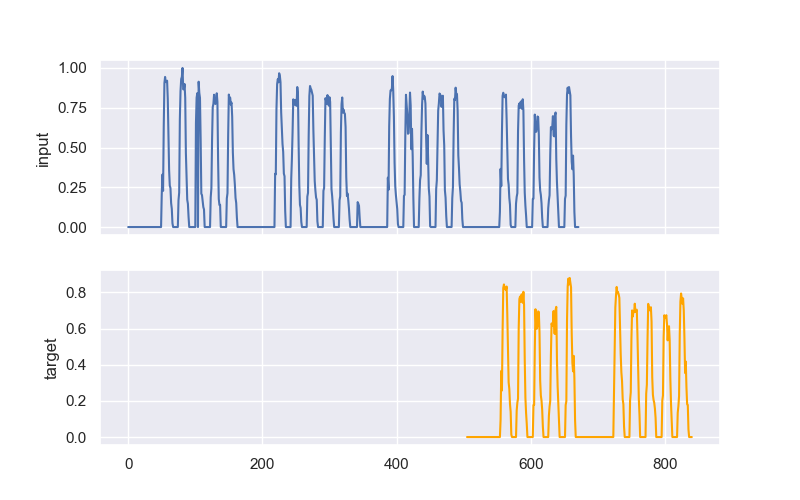

In [136]:
sequence_num = 375

fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)

ax1.plot(input_data[sequence_num])
ax1.set_ylabel('input')

ax2.plot(np.arange(n_input-steps_to_teach,n_input-steps_to_teach+n_out)+1, target_data[sequence_num], color='orange')
ax2.set_ylabel('target')

plt.show()

## vanilla LSTM/GRU (stateless)

first architecture is a basic Long Short-Term Memory network (or GRU) which takes in input a sequence of months (4 weeks) and gives in output a sequence of weeks

the simple application of LSTM is referred to as "vanilla" LSTM

even if lstm have memory they are not very good at remembering very long sequences therefore we try to increase the capacity of the network by "stacking" together two lstm layer

moreover to better characterize periodical patterns we try first a "stateful" model which doesn't reset internal state of the lstm cell from one sequence to the other

__following a schematic representation of an LSTM chain__

<img src="figures/basic_lstm_cell_elements.png">

__in the next picture basic components of an LSTM cell and comparison with a GRU cell__

<img src="figures/lstm_gru_conceptual.png">

visit __[this link](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)__ for more details

__batch size__ is really important parameter because it corresponds to the number of samples used by the optimization process to update internal weights of the network (therefore it also influences the update frequency of internal weights)

__moreover for the stateless implementations of recurrent network in keras the internal state of the network is resetted at the beginning of each new batch__

In [31]:
print(input_data.shape)
print(target_data.shape)

(1036, 672, 1)
(1036, 336, 1)


since each sample is 2 hours away from the adjacent ones we decided that one single batch should cover at least one week then considering a week is 168 hours the batch size should be 168/2 = 84

In [66]:
# define parameters
# batch for stochastic gradient descent: larger for more accurate but slower optimization
# smaller for faster but less accurate
first_n_samples, epochs, batch_size, verbose = input_data.shape[0]-86, 200, 84, 2

train_x = input_data[:first_n_samples]
train_y = target_data.reshape(-1,n_out)[:first_n_samples]

test_x = input_data[first_n_samples:]
test_y = target_data.reshape(-1,n_out)[first_n_samples:]

building the model we used some techniques to make the training process more stable and less prone to overfitting

1. batch normalization (normalizes output of the previous layer)
2. dropout (drop connections of less important nodes)
3. activity regularization (helps mantain a sparse representation of network activations)

even if choice of number of hidden layers and number of neurons can have a significant impact on training performance, there is not a clear rule for the best choice, usually the simplest configuration should be preferred and number of nodes and number of layer increased gradually as complexity increase only if the simple configuration does not work, it is basically an iterative and experimental work

__as a rule of thumb one should remember that most of the problems can be resolved with one hidden layer only and that the number of nodes should be comprised between the number of inputs and the number of outputs__

number of nodes should never be twice the maximum number between input and output

in our case we should remember that timesteps in recurrent network are processed one at a time by the network, so basically the number of input for the network corresponds to the number of features

so in our case since we are dealing with univariate timeseries and considering the selected output, the number of nodes should be between 1 and 336

_considering the output is 14 days we decide to place 4 nodes for each of the days in the output so 14*4 = 56 nodes_

__smaller batch sizes, smaller number of nodes and fewer hidden layers make generally the training process faster and more stable__

In [65]:
# name = 'vanilla_gru_stateless'
# name = 'vanilla_lstm_stateless'
name = 'vanilla_gru_stateless_with_teachf'
# name = 'vanilla_lstm_stateless_with_teachf'

plot_path = os.path.join('net_plots', name+'.png')
model_path = os.path.join('best_models', name+'.h5')

dropout_rate = 0.3

# backend.clear_session()
# model.reset_states()
# model.reset_metrics()

# model = load_model(model_path)

usage example of Keras sequential API

In [ ]:
# define model
model = Sequential()

# input semplice senza maschera
# model.add(Input(shape=(n_input, 1), name='input'))

# aggiungo una maschera per escludere dal processo tutti i punti mancanti
# essendo il primo strato della rete definisco anche la forma dell'input
model.add(Masking(mask_value=0, input_shape=(n_input, 1), name='input'))

# diverse inizializzazioni possono portare il processo di ottimizzazione verso minimi locali differenti
# example: kernel_initializer=initializers.he_uniform(), bias_initializer=initializers.random_uniform()

# i regolarizzatori ci permettono di stabilizzare il gradiente per combattere overfitting e exploding/vanishing gradient
# example: kernel_regularizer=l2(), activity_regularizer=l2()

# le reti sequenziali possono essere "sovrapposte" (stacked RNN) in modo da creare più layer ricorrenti
# in questo caso il primo layer deve ritornare una sequenza (return_sequences=True)
model.add(GRU(42, return_sequences=True))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(GRU(42))
model.add(BatchNormalization())
model.add(Activation('relu'))

# la tecnica di dropout ci permette di regolarizzare il processo di ottimizzazione (exploding/vanishing gradient)
# e aiuta a ridurre il rischio di overfitting
model.add(Dropout(dropout_rate))

# l'ultimo strato della rete è un fully connected  di dimensione pari all'output
model.add(Dense(n_out, name='output'))

# produce schematic representation of network architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

usage example of Keras functionl API

In [34]:
# input semplice senza maschera
input_layer = Input(shape=(n_input, 1), name='input')

# aggiungo una maschera per escludere dal processo tutti i punti mancanti
mask_layer = Masking(mask_value=0, name='mask')(input_layer)

gru_layer = GRU(56)(mask_layer)
batchnorm_layer = BatchNormalization()(gru_layer)
activation_layer = Activation('relu')(batchnorm_layer)

# adding dropout in training mode for error bars estimate
dropout_layer = Dropout(dropout_rate)(activation_layer, training=True)

#l'ultimo strato della rete è un fully connected  di dimensione pari all'output
output_layer = Dense(n_out, name='output')(dropout_layer)

# define model
model = Model(input_layer,output_layer)

# produce schematic representation of network architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 672, 1)]          0         
_________________________________________________________________
mask (Masking)               (None, 672, 1)            0         
_________________________________________________________________
gru (GRU)                    (None, 56)                9912      
_________________________________________________________________
batch_normalization (BatchNo (None, 56)                224       
_________________________________________________________________
activation (Activation)      (None, 56)                0         
_________________________________________________________________
dropout (Dropout)            (None, 56)                0         
_________________________________________________________________
output (Dense)               (None, 336)               19152 

In [35]:
# per avviare tensorboard in modo che recuperi i dati di log prodotti dal callback avviare un terminale da anaconda
# posizionarsi nella directory dove gira il notebook e digitare: tensorboard --logdir=logs/

# tensorboard example
# callback_tensorboard = TensorBoard(log_dir="logs\{}".format(time()))
# other param... histogram_freq=20, embeddings_freq=20

# il profile_batch viene disabilitato in quanto molto lento sul nostro portatile...
callback_tensorboard = TensorBoard(log_dir=os.path.join('logs', name), profile_batch=0)
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callback_reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, min_lr=1e-5, min_delta=0.002, patience=10, verbose=1)

# callback_early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

callbacks = [callback_tensorboard,callback_model_checkpoint,callback_reduce_lr]

In [36]:
# per le funzioni di ottimizzazione (e per la funzione di costo) si possono utilizzare i parametri di default
# oppure settare manualmente alcune impostazioni: clipnorm o clipvalue di solito per limitare il valore della derivata
# e controllare la crescita del gradiente
# lr è il learning rate

# optimizer = SGD(momentum=0.5, nesterov=True, lr=0.1)
# optimizer = RMSprop(lr=0.005, clipvalue=1.0)
# optimizer = Adagrad(learning_rate=0.5)

optimizer = Adam(lr=0.01)

model.compile(loss='mse', optimizer=optimizer)

# to recover a previous state
# model.save_weights('weights\\'+name+'_weights.h5')
# model.load_weights('weights\\'+name+'_weights.h5')

# fit network
history = model.fit(train_x, train_y, validation_split=0.2, epochs=epochs,
                    batch_size=batch_size, verbose=verbose, callbacks=callbacks, shuffle=False)

Train on 760 samples, validate on 190 samples
Epoch 1/200
760/760 - 15s - loss: 0.1228 - val_loss: 0.1354
Epoch 2/200
760/760 - 8s - loss: 0.0835 - val_loss: 0.1271
Epoch 3/200
760/760 - 10s - loss: 0.0775 - val_loss: 0.1260
Epoch 4/200
760/760 - 11s - loss: 0.0727 - val_loss: 0.1259
Epoch 5/200
760/760 - 17s - loss: 0.0697 - val_loss: 0.1221
Epoch 6/200
760/760 - 13s - loss: 0.0682 - val_loss: 0.1211
Epoch 7/200
760/760 - 12s - loss: 0.0666 - val_loss: 0.1195
Epoch 8/200
760/760 - 11s - loss: 0.0646 - val_loss: 0.1164
Epoch 9/200
760/760 - 11s - loss: 0.0646 - val_loss: 0.1147
Epoch 10/200
760/760 - 11s - loss: 0.0642 - val_loss: 0.1132
Epoch 11/200
760/760 - 11s - loss: 0.0616 - val_loss: 0.1122
Epoch 12/200
760/760 - 11s - loss: 0.0611 - val_loss: 0.1136
Epoch 13/200
760/760 - 11s - loss: 0.0577 - val_loss: 0.1167
Epoch 14/200
760/760 - 11s - loss: 0.0549 - val_loss: 0.1149
Epoch 15/200
760/760 - 11s - loss: 0.0550 - val_loss: 0.1180
Epoch 16/200
760/760 - 11s - loss: 0.0634 - val_l

Epoch 131/200
760/760 - 11s - loss: 0.0289 - val_loss: 0.0293
Epoch 132/200
760/760 - 11s - loss: 0.0290 - val_loss: 0.0312
Epoch 133/200
760/760 - 11s - loss: 0.0300 - val_loss: 0.0300
Epoch 134/200
760/760 - 11s - loss: 0.0294 - val_loss: 0.0288
Epoch 135/200
760/760 - 11s - loss: 0.0293 - val_loss: 0.0289
Epoch 136/200
760/760 - 11s - loss: 0.0293 - val_loss: 0.0285
Epoch 137/200
760/760 - 11s - loss: 0.0298 - val_loss: 0.0291
Epoch 138/200
760/760 - 13s - loss: 0.0307 - val_loss: 0.0282
Epoch 139/200
760/760 - 11s - loss: 0.0293 - val_loss: 0.0293
Epoch 140/200
760/760 - 11s - loss: 0.0296 - val_loss: 0.0280
Epoch 141/200
760/760 - 11s - loss: 0.0294 - val_loss: 0.0282
Epoch 142/200
760/760 - 11s - loss: 0.0301 - val_loss: 0.0278
Epoch 143/200
760/760 - 11s - loss: 0.0290 - val_loss: 0.0279
Epoch 144/200
760/760 - 11s - loss: 0.0295 - val_loss: 0.0279
Epoch 145/200
760/760 - 11s - loss: 0.0299 - val_loss: 0.0272
Epoch 146/200
760/760 - 11s - loss: 0.0298 - val_loss: 0.0278
Epoch 14

In [67]:
model = load_model(model_path)

<IPython.core.display.Javascript object>


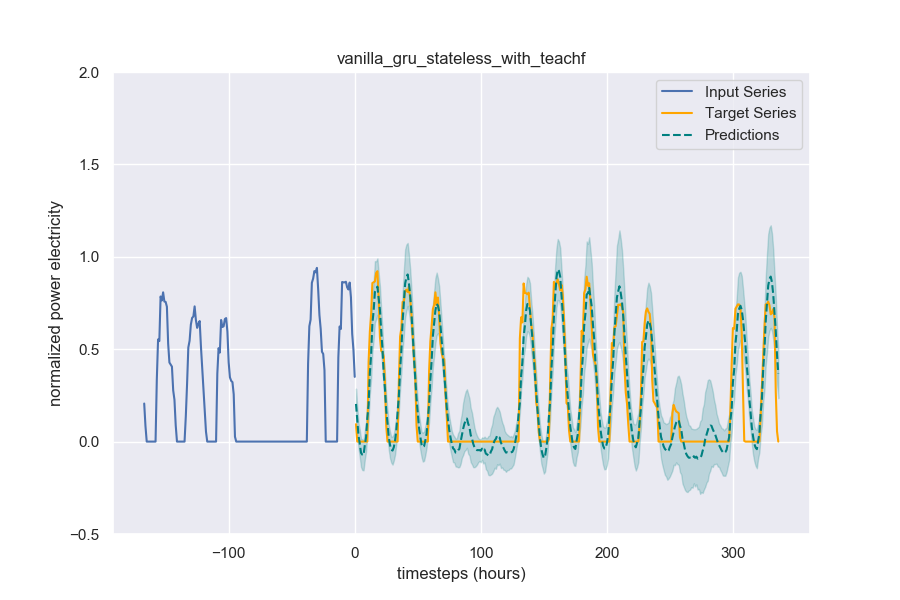

In [68]:
ind = 0
predict_and_plot(input_data, target_data, first_n_samples + ind, step_length, pred_steps=2)

In [69]:
calculate_score(test_x, test_y)


R2 prediction score: 0.866123



In [40]:
model.evaluate(test_x, test_y, batch_size=batch_size)

86/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.02483409400596175

## vanilla LSTM/GRU (stateful)

stateful recurrent models in keras allow to preserve internal state along different batches, the only disadvantage is that to preserve the internal state the batch size have to be fixed and specified at the input, for the same reason validation set have to be provided directly for the training session

In [30]:
print(input_data.shape)
print(target_data.shape)

(1036, 672, 1)
(1036, 336, 1)


In [42]:
# define parameters
first_n_samples, epochs, batch_size, verbose = input_data.shape[0]-336, 200, 50, 2

val_n_samples = input_data.shape[0]-136

train_x = input_data[:first_n_samples]
train_y = target_data.reshape(-1,n_out)[:first_n_samples]

# for the stateful approach train and validation must be defined separately because batch size have to specified
val_x = input_data[first_n_samples:val_n_samples]
val_y = target_data.reshape(-1,n_out)[first_n_samples:val_n_samples]

test_x = input_data[val_n_samples:]
test_y = target_data.reshape(-1,n_out)[val_n_samples:]

In [32]:
# name = 'vanilla_gru_stateful'
# name = 'vanilla_lstm_stateful'
name = 'vanilla_gru_stateful_with_teachf'
# name = 'vanilla_lstm_stateful_with_teachf'

plot_path = os.path.join('net_plots', name+'.png')
model_path = os.path.join('best_models', name+'.h5')

dropout_rate = 0.3

# backend.clear_session()
# model.reset_states()
# model.reset_metrics()

# model = load_model(model_path)

In [33]:
# input semplice senza maschera
input_layer = Input(batch_shape=(batch_size, n_input, 1), name='input')

# aggiungo una maschera per escludere dal processo tutti i punti mancanti
mask_layer = Masking(mask_value=0, name='mask')(input_layer)

gru_layer = GRU(56, stateful=True)(mask_layer)
batchnorm_layer = BatchNormalization()(gru_layer)
activation_layer = Activation('relu')(batchnorm_layer)

# adding dropout in training mode for error bars estimate
dropout_layer = Dropout(dropout_rate)(activation_layer, training=True)

#l'ultimo strato della rete è un fully connected  di dimensione pari all'output
output_layer = Dense(n_out, name='output')(dropout_layer)

# define model
model = Model(input_layer,output_layer)

# produce schematic representation of network architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(50, 672, 1)]            0         
_________________________________________________________________
mask (Masking)               (50, 672, 1)              0         
_________________________________________________________________
gru (GRU)                    (50, 56)                  9912      
_________________________________________________________________
batch_normalization (BatchNo (50, 56)                  224       
_________________________________________________________________
activation (Activation)      (50, 56)                  0         
_________________________________________________________________
dropout (Dropout)            (50, 56)                  0         
_________________________________________________________________
output (Dense)               (50, 336)                 19152 

In [34]:
callback_tensorboard = TensorBoard(log_dir=os.path.join('logs', name), profile_batch=0)
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callback_reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, min_lr=1e-5, min_delta=0.002, patience=10, verbose=1)

callbacks = [callback_tensorboard,callback_model_checkpoint,callback_reduce_lr]

In [35]:
adam = Adam(lr=0.01)

model.compile(loss='mse', optimizer=adam)

# model.save_weights('weights\\'+name+'_weights.h5')
# model.load_weights('weights\\'+name+'_weights.h5')

# fit network
# with explicit validation definition
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs,
                    batch_size=batch_size, verbose=verbose, callbacks=callbacks, shuffle=False)

Train on 700 samples, validate on 200 samples
Epoch 1/200
700/700 - 16s - loss: 0.1087 - val_loss: 0.1171
Epoch 2/200
700/700 - 11s - loss: 0.0801 - val_loss: 0.1116
Epoch 3/200
700/700 - 11s - loss: 0.0728 - val_loss: 0.1087
Epoch 4/200
700/700 - 12s - loss: 0.0666 - val_loss: 0.1088
Epoch 5/200
700/700 - 12s - loss: 0.0648 - val_loss: 0.1077
Epoch 6/200
700/700 - 12s - loss: 0.0628 - val_loss: 0.1084
Epoch 7/200
700/700 - 12s - loss: 0.0621 - val_loss: 0.1088
Epoch 8/200
700/700 - 11s - loss: 0.0606 - val_loss: 0.1089
Epoch 9/200
700/700 - 12s - loss: 0.0611 - val_loss: 0.1086
Epoch 10/200
700/700 - 11s - loss: 0.0567 - val_loss: 0.1082
Epoch 11/200
700/700 - 11s - loss: 0.0589 - val_loss: 0.1068
Epoch 12/200
700/700 - 12s - loss: 0.0558 - val_loss: 0.1063
Epoch 13/200
700/700 - 11s - loss: 0.0536 - val_loss: 0.1068
Epoch 14/200
700/700 - 11s - loss: 0.0510 - val_loss: 0.1062
Epoch 15/200
700/700 - 11s - loss: 0.0518 - val_loss: 0.1030
Epoch 16/200
700/700 - 11s - loss: 0.0508 - val_

Epoch 131/200
700/700 - 12s - loss: 0.0314 - val_loss: 0.0515
Epoch 132/200
700/700 - 12s - loss: 0.0318 - val_loss: 0.0505
Epoch 133/200
700/700 - 13s - loss: 0.0311 - val_loss: 0.0504
Epoch 134/200
700/700 - 12s - loss: 0.0317 - val_loss: 0.0513
Epoch 135/200
700/700 - 13s - loss: 0.0309 - val_loss: 0.0524
Epoch 136/200
700/700 - 13s - loss: 0.0319 - val_loss: 0.0508
Epoch 137/200
700/700 - 12s - loss: 0.0315 - val_loss: 0.0506
Epoch 138/200
700/700 - 14s - loss: 0.0313 - val_loss: 0.0509
Epoch 139/200
700/700 - 12s - loss: 0.0313 - val_loss: 0.0511
Epoch 140/200
700/700 - 12s - loss: 0.0315 - val_loss: 0.0506
Epoch 141/200
700/700 - 12s - loss: 0.0312 - val_loss: 0.0521
Epoch 142/200
700/700 - 12s - loss: 0.0313 - val_loss: 0.0511
Epoch 143/200
700/700 - 13s - loss: 0.0317 - val_loss: 0.0515
Epoch 144/200
700/700 - 12s - loss: 0.0314 - val_loss: 0.0518
Epoch 145/200
700/700 - 13s - loss: 0.0314 - val_loss: 0.0507
Epoch 146/200
700/700 - 15s - loss: 0.0311 - val_loss: 0.0501
Epoch 14

<IPython.core.display.Javascript object>


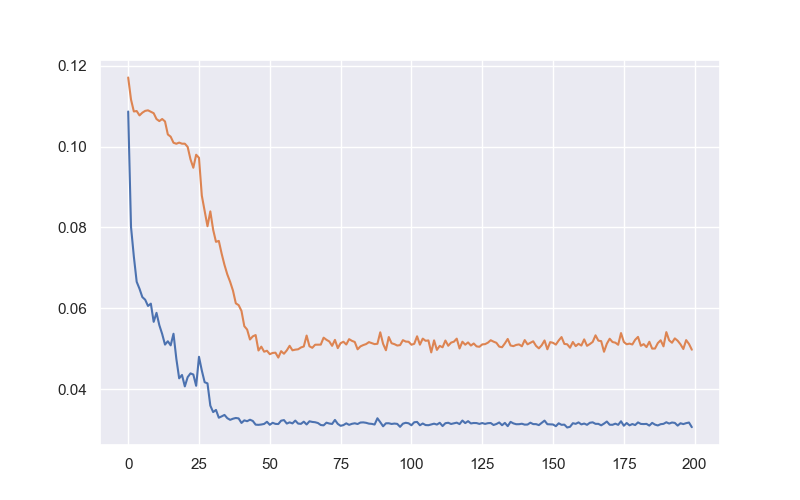

In [36]:
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.show()

In [37]:
model = load_model(model_path)

<IPython.core.display.Javascript object>


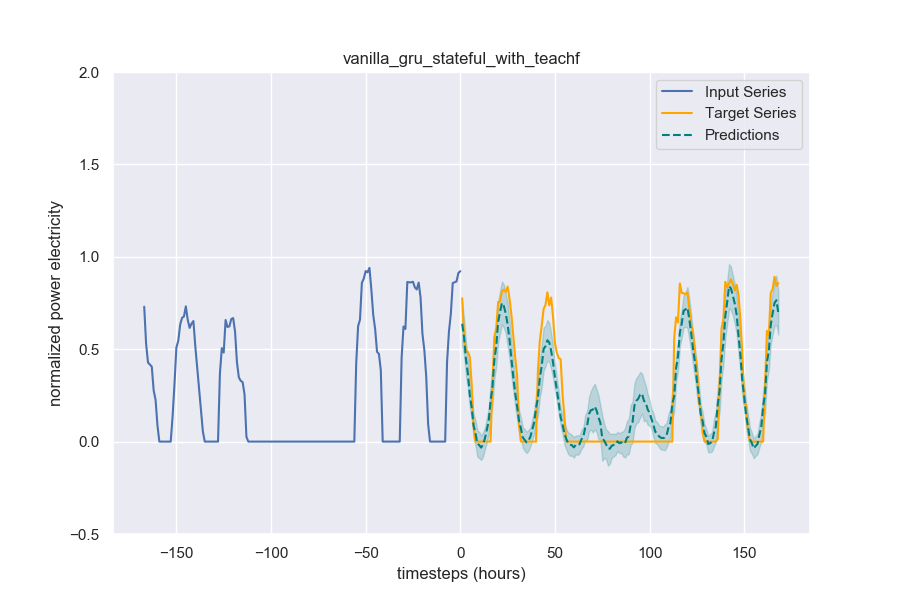

In [50]:
ind = 10
predict_and_plot(input_data, target_data, val_n_samples + ind, step_length, batch_size)

In [64]:
calculate_score(test_x, test_y, batch_size)


R2 prediction score: 0.852753



In [45]:
model.evaluate(test_x[:100], test_y[:100], batch_size=batch_size)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.027810825034976006

## horizontal voting ensamble

another common technique to reduce error and increase prediction performance is to make an ensamble prediction of different models

in the next we will train a simple vanilla LSTM and save the last 10 epochs as separate models, then we make a prediction from the average of the predictions of all the 10 models 

In [30]:
print(input_data.shape)
print(target_data.shape)

(1036, 672, 1)
(1036, 336, 1)


In [31]:
# define parameters
# batch for stochastic gradient descent: larger for more accurate but slower optimization
# smaller for faster but less accurate
first_n_samples = input_data.shape[0]-86

train_x = input_data[:first_n_samples]
train_y = target_data.reshape(-1,n_out)[:first_n_samples]

test_x = input_data[first_n_samples:]
test_y = target_data.reshape(-1,n_out)[first_n_samples:]

In [39]:
backend.clear_session()
model.reset_states()
model.reset_metrics()

In [40]:
# input semplice senza maschera
input_layer = Input(shape=(n_input, 1), name='input')

# aggiungo una maschera per escludere dal processo tutti i punti mancanti
mask_layer = Masking(mask_value=0, name='mask')(input_layer)

gru_layer = GRU(56)(mask_layer)
batchnorm_layer = BatchNormalization()(gru_layer)
activation_layer = Activation('relu')(batchnorm_layer)

#l'ultimo strato della rete è un fully connected  di dimensione pari all'output
output_layer = Dense(n_out, name='output')(activation_layer)

# define model
model = Model(input_layer,output_layer)

optimizer = Adam(lr=0.005)

model.compile(loss='mse', optimizer=optimizer)

# create directory for models
makedirs('voting_ensamble_models', exist_ok=True)

In [41]:
# train model
losses = []
val_losses = []

n_epochs, n_save_after, n_steps, batch_size, verbose = 100, 60, 5, 84, 2

for i in range(n_epochs):
    # fit model for a single epoch
    model.fit(train_x, train_y, validation_split=0.2, epochs=1, batch_size=batch_size, verbose=verbose, shuffle=False)
    losses.append(model.history.history['loss'][0])
    val_losses.append(model.history.history['val_loss'][0])
    # check if we should save the model
    if (i >= n_save_after) and (i//n_steps == i/n_steps):
        model.save(os.path.join('voting_ensamble_models','model_' + str(i) + '.h5'))

Train on 760 samples, validate on 190 samples
760/760 - 15s - loss: 0.1217 - val_loss: 0.1519
Train on 760 samples, validate on 190 samples
760/760 - 9s - loss: 0.0836 - val_loss: 0.1384
Train on 760 samples, validate on 190 samples
760/760 - 11s - loss: 0.0747 - val_loss: 0.1359
Train on 760 samples, validate on 190 samples
760/760 - 11s - loss: 0.0701 - val_loss: 0.1277
Train on 760 samples, validate on 190 samples
760/760 - 11s - loss: 0.0660 - val_loss: 0.1279
Train on 760 samples, validate on 190 samples
760/760 - 10s - loss: 0.0626 - val_loss: 0.1273
Train on 760 samples, validate on 190 samples
760/760 - 11s - loss: 0.0624 - val_loss: 0.1240
Train on 760 samples, validate on 190 samples
760/760 - 12s - loss: 0.0626 - val_loss: 0.1234
Train on 760 samples, validate on 190 samples
760/760 - 11s - loss: 0.0615 - val_loss: 0.1248
Train on 760 samples, validate on 190 samples
760/760 - 11s - loss: 0.0573 - val_loss: 0.1232
Train on 760 samples, validate on 190 samples
760/760 - 11s -

760/760 - 11s - loss: 0.0207 - val_loss: 0.0287
Train on 760 samples, validate on 190 samples
760/760 - 11s - loss: 0.0182 - val_loss: 0.0186
Train on 760 samples, validate on 190 samples
760/760 - 12s - loss: 0.0188 - val_loss: 0.0220
Train on 760 samples, validate on 190 samples
760/760 - 13s - loss: 0.0184 - val_loss: 0.0173
Train on 760 samples, validate on 190 samples
760/760 - 14s - loss: 0.0184 - val_loss: 0.0233
Train on 760 samples, validate on 190 samples
760/760 - 12s - loss: 0.0186 - val_loss: 0.0174
Train on 760 samples, validate on 190 samples
760/760 - 11s - loss: 0.0181 - val_loss: 0.0183
Train on 760 samples, validate on 190 samples
760/760 - 12s - loss: 0.0186 - val_loss: 0.0207
Train on 760 samples, validate on 190 samples
760/760 - 11s - loss: 0.0194 - val_loss: 0.0197
Train on 760 samples, validate on 190 samples
760/760 - 11s - loss: 0.0185 - val_loss: 0.0214
Train on 760 samples, validate on 190 samples
760/760 - 11s - loss: 0.0185 - val_loss: 0.0200
Train on 760

<IPython.core.display.Javascript object>


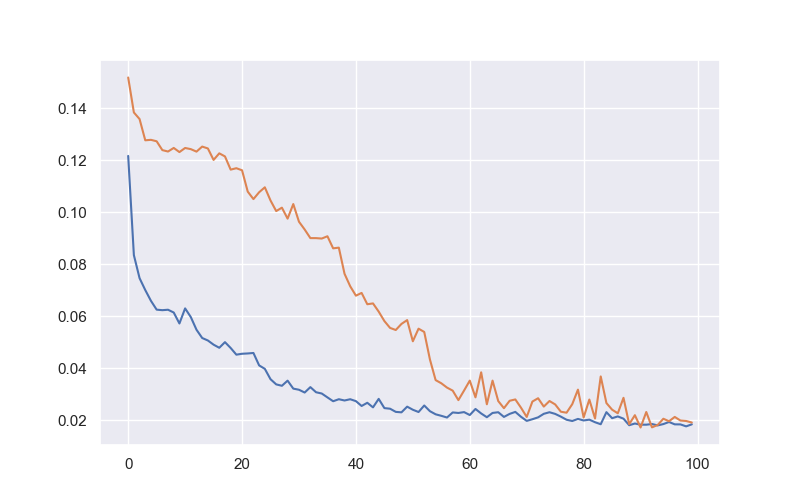

In [42]:
plt.figure()
plt.plot(losses, label='train')
plt.plot(val_losses, label='test')
plt.show()

In [44]:
# load all models, predict and plot

all_models = []

for epoch in range(n_save_after, n_epochs, n_steps):
    # define filename for this ensemble
    filename = os.path.join('voting_ensamble_models','model_' + str(epoch) + '.h5')
    # load model from file
    model = load_model(filename)
    # add to list of members
    all_models.append(model)
    print('>loaded %s' % filename)

>loaded voting_ensamble_models\model_60.h5
>loaded voting_ensamble_models\model_65.h5
>loaded voting_ensamble_models\model_70.h5
>loaded voting_ensamble_models\model_75.h5
>loaded voting_ensamble_models\model_80.h5
>loaded voting_ensamble_models\model_85.h5
>loaded voting_ensamble_models\model_90.h5
>loaded voting_ensamble_models\model_95.h5


<IPython.core.display.Javascript object>


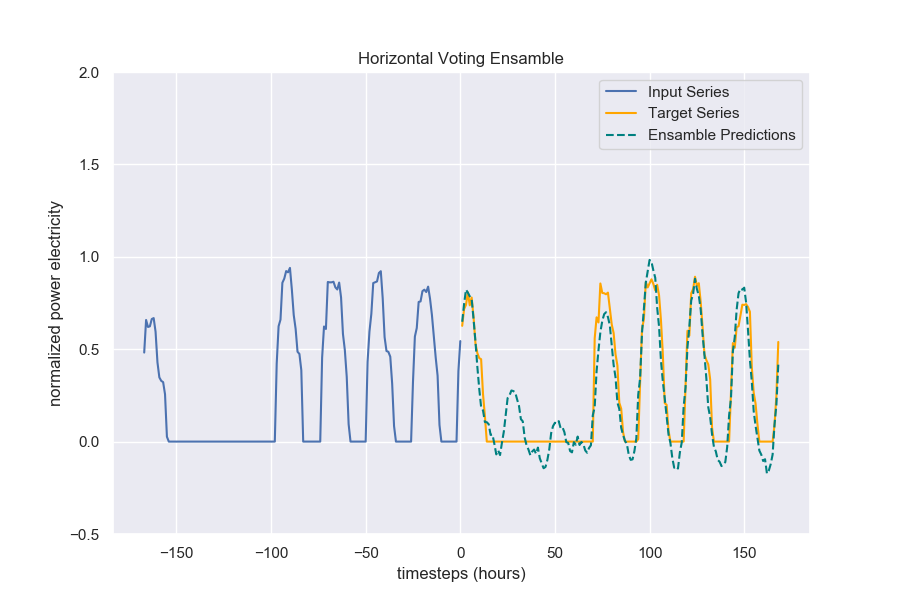

In [48]:
sample_ind = first_n_samples + 30

encode_series = input_data[sample_ind:sample_ind+1,:,:]

# make predictions
predictions = [model.predict(encode_series)[0,-step_length:] for model in all_models]

# average across ensemble members
ensamble_predictions = np.mean(predictions, axis=0)

encode_series = encode_series.reshape(-1)
pred_series = ensamble_predictions.reshape(-1)
target_series = target_data[sample_ind,-step_length:,0].reshape(-1)

encode_series_tail = encode_series[-168:]

plt.figure(figsize=(9,6))
    
plt.plot(np.arange(len(encode_series_tail))[::-1]*-1,encode_series_tail)
plt.plot(np.arange(len(target_series))+1,target_series,color='orange')
plt.plot(np.arange(len(pred_series))+1,pred_series,color='teal',linestyle='--')

plt.title('Horizontal Voting Ensamble')
plt.legend(['Input Series','Target Series','Ensamble Predictions'])
plt.ylim(-0.5,2)
plt.xlabel('timesteps (hours)')
plt.ylabel('normalized power electricity')

plt.show()

## attention LSTM

before to proceed with more complex architectures we will try to implement an lstm with an attention mechanism

the attention mechanism should be able to select most relevant portion of the input signal in order to produce the desired output

the attention layer can be placed before the lstm to filter the input or after the lstm to filter the output, in our case we decided to place the attention layer before the lstm in order to discard irrelevant portion of the signal before lstm processing, this should increase performance and overall result

__following a simple representation of the attention block implemented__

<img src="figures/attention_block_representation.png">

visit __[this link](https://github.com/philipperemy/keras-attention-mechanism)__ for more details

#### definitions

In [50]:
def Attention(single_attention_vector=False):
    def attention_layer(inputs):
        timesteps = inputs.shape[1]
        features = inputs.shape[2]
        if timesteps == None:
            raise Exception('Input size should be declared explicitly')
        a = Permute((2, 1))(inputs)
        a = Dense(timesteps, activation='softmax')(a)
        if single_attention_vector:
            a = Lambda(lambda x: backend.mean(x, axis=1), name='dim_reduction')(a)
            a = RepeatVector(features)(a)
        a_probs = Permute((2, 1), name='attention_vec')(a)
        output_attention_mul = Multiply(name='attention_mul')([inputs, a_probs])
        return output_attention_mul
    return attention_layer

def get_activations(model, inputs, layer_name=None):
    # Documentation is available online on Github at the address below.
    # From: https://github.com/philipperemy/keras-visualize-activations
    activations = []
    inp = model.input
    
    if layer_name is None:
        outputs = [layer.output for layer in model.layers]
    else:
        outputs = [layer.output for layer in model.layers if layer.name == layer_name]  # all layer outputs
    
    if backend.learning_phase() != 0:
        inp = [inp] + [backend.learning_phase()]
    else:
        inp = [inp]
    
    funcs = [backend.function(inp, [out]) for out in outputs]  # evaluation functions
    layer_outputs = [func([inputs, 1.])[0] for func in funcs]
    
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
    
    return activations

def get_data_recurrent(n, time_steps, input_dim, attention_column=10):
    """
    Data generation. x is purely random except that it's first value equals the target y.
    In practice, the network should learn that the target = x[attention_column].
    Therefore, most of its attention should be focused on the value addressed by attention_column.
    :param n: the number of samples to retrieve.
    :param time_steps: the number of time steps of your series.
    :param input_dim: the number of dimensions of each element in the series.
    :param attention_column: the column linked to the target. Everything else is purely random.
    :return: x: model inputs, y: model targets
    """
    x = np.random.standard_normal(size=(n, time_steps, input_dim))
    y = np.random.randint(low=0, high=2, size=(n, 1))
    x[:, attention_column, :] = np.tile(y[:], (1, input_dim))
    return x, y

In [32]:
print(input_data.shape)
print(target_data.shape)

(1036, 672, 1)
(1036, 336, 1)


In [33]:
# define parameters
# batch for stochastic gradient descent: larger for more accurate but slower optimization
# smaller for faster but less accurate
first_n_samples, epochs, batch_size, verbose = input_data.shape[0]-86, 100, 84, 2

train_x = input_data[:first_n_samples]
train_y = target_data.reshape(-1,n_out)[:first_n_samples]

test_x = input_data[first_n_samples:]
test_y = target_data.reshape(-1,n_out)[first_n_samples:]

#### attention before

In [84]:
name = 'gru_with_attention_before'

plot_path = os.path.join('net_plots', name+'.png')
model_path = os.path.join('best_models', name+'.h5')

dropout_rate = 0.3

# backend.clear_session()
# model.reset_states()
# model.reset_metrics()

# model = load_model(model_path)

In [85]:
# input semplice senza maschera
input_layer = Input(shape=(n_input, 1), name='input')

# aggiungo una maschera per escludere dal processo tutti i punti mancanti
mask_layer = Masking(mask_value=0, name='mask')(input_layer)

attention_layer = Attention()(mask_layer)

gru_layer = GRU(56)(attention_layer)
batchnorm_layer = BatchNormalization()(gru_layer)
activation_layer = Activation('relu')(batchnorm_layer)

# adding dropout in training mode for error bars estimate
dropout_layer = Dropout(dropout_rate)(activation_layer, training=True)

#l'ultimo strato della rete è un fully connected  di dimensione pari all'output
output_layer = Dense(n_out, name='output')(dropout_layer)

# define model
model = Model(input_layer,output_layer)

# produce schematic representation of network architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 672, 1)]     0                                            
__________________________________________________________________________________________________
mask (Masking)                  (None, 672, 1)       0           input[0][0]                      
__________________________________________________________________________________________________
permute (Permute)               (None, 1, 672)       0           mask[0][0]                       
__________________________________________________________________________________________________
dense (Dense)                   (None, 1, 672)       452256      permute[0][0]                    
______________________________________________________________________________________________

In [86]:
callback_tensorboard = TensorBoard(log_dir=os.path.join('logs', name), profile_batch=0)
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callback_reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, min_lr=1e-5, min_delta=0.002, patience=10, verbose=1)

callbacks = [callback_tensorboard,callback_model_checkpoint,callback_reduce_lr]

In [ ]:
optimizer = Adam(lr=0.01)

model.compile(loss='mse', optimizer=optimizer)

# fit network
history = model.fit(train_x, train_y, validation_split=0.2, epochs=epochs, batch_size=batch_size,
                    verbose=verbose, callbacks=callbacks, shuffle=False)

Train on 760 samples, validate on 190 samples
Epoch 1/100
760/760 - 20s - loss: 0.1249 - val_loss: 0.1147
Epoch 2/100
760/760 - 12s - loss: 0.0934 - val_loss: 0.1143
Epoch 3/100
760/760 - 13s - loss: 0.0875 - val_loss: 0.1156
Epoch 4/100
760/760 - 13s - loss: 0.0863 - val_loss: 0.1148
Epoch 5/100
760/760 - 14s - loss: 0.0851 - val_loss: 0.1157
Epoch 6/100
760/760 - 14s - loss: 0.0832 - val_loss: 0.1159
Epoch 7/100
760/760 - 14s - loss: 0.0794 - val_loss: 0.1163
Epoch 8/100
760/760 - 15s - loss: 0.0782 - val_loss: 0.1155
Epoch 9/100
760/760 - 14s - loss: 0.0782 - val_loss: 0.1139
Epoch 10/100
760/760 - 15s - loss: 0.0766 - val_loss: 0.1128
Epoch 11/100
760/760 - 15s - loss: 0.0753 - val_loss: 0.1120
Epoch 12/100
760/760 - 16s - loss: 0.0768 - val_loss: 0.1102
Epoch 13/100
760/760 - 15s - loss: 0.0754 - val_loss: 0.1108
Epoch 14/100
760/760 - 15s - loss: 0.0749 - val_loss: 0.1128
Epoch 15/100
760/760 - 15s - loss: 0.0739 - val_loss: 0.1106
Epoch 16/100
760/760 - 15s - loss: 0.0737 - val_

In [67]:
model = load_model(model_path)

In [ ]:
ind = 0
predict_and_plot(input_data, target_data, first_n_samples + ind, step_length, pred_steps=2)

In [ ]:
calculate_score(test_x, test_y)

In [ ]:
model.evaluate(test_x, test_y, batch_size=batch_size)

In [ ]:
attention_vectors = []

for i in range(300):
    testing_inputs, testing_outputs = get_data_recurrent(1, n_input, 1)
    attention_vector = np.mean(get_activations(model, testing_inputs, print_shape_only=True, layer_name='attention_vec')[0], axis=2).squeeze()

    assert (np.sum(attention_vector) - 1.0) < 1e-5
    attention_vectors.append(attention_vector)

attention_vector_final = np.mean(np.array(attention_vectors), axis=0)

pd.DataFrame(attention_vector_final, columns=['attention (%)']).plot(kind='bar', title='Attention Mechanism as a function of input dimensions.')

plt.xlim(635,675)

plt.show()

#### attention after

In [94]:
name = 'gru_with_attention_after'

plot_path = os.path.join('net_plots', name+'.png')
model_path = os.path.join('best_models', name+'.h5')

dropout_rate = 0.3

backend.clear_session()
model.reset_states()
model.reset_metrics()

# model = load_model(model_path)

In [46]:
# input semplice senza maschera
input_layer = Input(shape=(n_input, 1), name='input')

# aggiungo una maschera per escludere dal processo tutti i punti mancanti
mask_layer = Masking(mask_value=0, name='mask')(input_layer)

gru_layer = GRU(56, return_sequences=True)(mask_layer)
batchnorm_layer = BatchNormalization()(gru_layer)
activation_layer = Activation('relu')(batchnorm_layer)

attention_layer = Attention()(activation_layer)
dropout_layer = Dropout(dropout_rate)(attention_layer, training=True)

flatten_layer = Flatten()(dropout_layer)
dropout_layer = Dropout(dropout_rate)(flatten_layer, training=True)

#l'ultimo strato della rete è un fully connected  di dimensione pari all'output
output_layer = Dense(n_out, name='output')(dropout_layer)

# define model
model = Model(input_layer,output_layer)

# produce schematic representation of network architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 672, 1)]     0                                            
__________________________________________________________________________________________________
mask (Masking)                  (None, 672, 1)       0           input[0][0]                      
__________________________________________________________________________________________________
gru (GRU)                       (None, 672, 56)      9912        mask[0][0]                       
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 672, 56)      224         gru[0][0]                        
______________________________________________________________________________________________

In [47]:
callback_tensorboard = TensorBoard(log_dir=os.path.join('logs', name), profile_batch=0)
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callback_reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, min_lr=1e-5, min_delta=0.001, patience=10, verbose=1)

callbacks = [callback_tensorboard,callback_model_checkpoint,callback_reduce_lr]

In [48]:
optimizer = Adam(lr=0.01)

model.compile(loss='mse', optimizer=optimizer)

# fit network
history = model.fit(train_x, train_y, validation_split=0.2, epochs=epochs, batch_size=batch_size,
                    verbose=verbose, callbacks=callbacks, shuffle=False)

Train on 760 samples, validate on 190 samples
Epoch 1/100
760/760 - 23s - loss: 0.0725 - val_loss: 0.1486
Epoch 2/100
760/760 - 16s - loss: 0.0229 - val_loss: 0.1472
Epoch 3/100
760/760 - 15s - loss: 0.0170 - val_loss: 0.1430
Epoch 4/100
760/760 - 14s - loss: 0.0153 - val_loss: 0.1425
Epoch 5/100
760/760 - 15s - loss: 0.0126 - val_loss: 0.1406
Epoch 6/100
760/760 - 14s - loss: 0.0118 - val_loss: 0.1395
Epoch 7/100
760/760 - 14s - loss: 0.0126 - val_loss: 0.1366
Epoch 8/100
760/760 - 15s - loss: 0.0126 - val_loss: 0.1370
Epoch 9/100
760/760 - 15s - loss: 0.0104 - val_loss: 0.1351
Epoch 10/100
760/760 - 15s - loss: 0.0090 - val_loss: 0.1344
Epoch 11/100
760/760 - 15s - loss: 0.0086 - val_loss: 0.1332
Epoch 12/100
760/760 - 16s - loss: 0.0079 - val_loss: 0.1325
Epoch 13/100
760/760 - 16s - loss: 0.0077 - val_loss: 0.1319
Epoch 14/100
760/760 - 16s - loss: 0.0078 - val_loss: 0.1286
Epoch 15/100
760/760 - 15s - loss: 0.0076 - val_loss: 0.1269
Epoch 16/100
760/760 - 15s - loss: 0.0079 - val_

In [95]:
model = load_model(model_path)

<IPython.core.display.Javascript object>


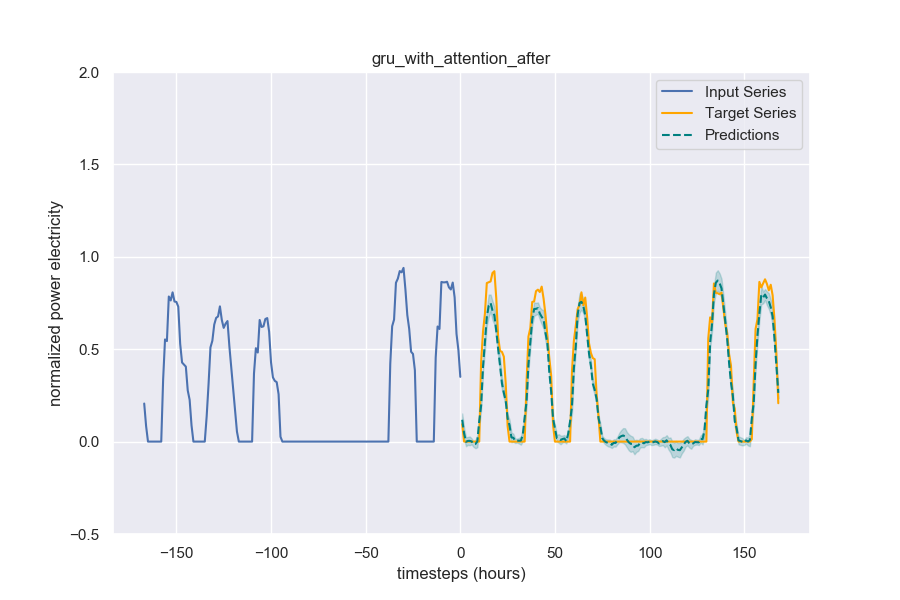

In [96]:
ind = 0
predict_and_plot(input_data, target_data, first_n_samples + ind, step_length)

In [51]:
calculate_score(test_x, test_y)


R2 prediction score: 0.941201



In [97]:
model.evaluate(test_x, test_y, batch_size=batch_size)

86/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0067319197493583656

In [119]:
attention_vectors = []

for i in range(300):
    testing_inputs, testing_outputs = get_data_recurrent(1, n_input, 1)
    attention_vector = np.mean(get_activations(model, testing_inputs, layer_name='attention_vec')[0], axis=2).squeeze()
    
    # check condition and throw an execption if it is false (basically the sum of all attention should be approx one)
    assert (np.sum(attention_vector) - 1.0) < 1e-5
    attention_vectors.append(attention_vector)

attention_vector_final = np.mean(np.array(attention_vectors), axis=0)

<IPython.core.display.Javascript object>


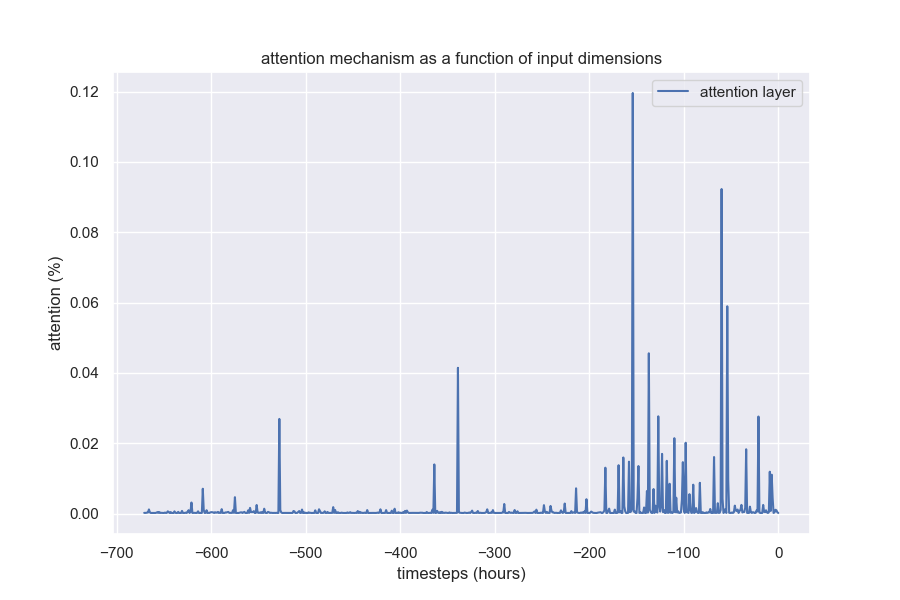

In [131]:
encode_series = test_x[0,:,0]

plt.figure(figsize=(9,6))
    
plt.plot(np.arange(len(attention_vector_final))[::-1]*-1,attention_vector_final)
# plt.plot(np.arange(len(encode_series))[::-1]*-1,encode_series*max(attention_vector_final)/max(encode_series),color='orange')

plt.title('attention mechanism as a function of input dimensions')
plt.legend(['attention layer','input series'])
plt.xlabel('timesteps (hours)')
plt.ylabel('attention (%)')

plt.show()

## _definitions and data prep - seq2seq_

Now we are going to implement a robust encoding-decoding architecture, the 'teacher forcing' approach will be used to train the network (part of the target is included in the input)

the basic approach is to use an lstm as encoder to learn the context of the sequence, then hidden and cell state of the encoder will be used as input for the decoder (another lstm) which learn to predict the sequence "step by step" (with a recursive multistep approach)

input of the encoder is selected to be 4 weeks, output of decoder is 2 weeks with teacher forcing, prediction step length is 1 week (for prediction we used 2 steps then a 2 weeks prediction)

In [29]:
def decode_sequence(input_seq, pred_steps, step_length):
    
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    dec_input_seq = np.zeros((1, step_length, 1))
    
    # Populate the first target sequence with end of encoding series pageviews
    dec_input_seq[0, :, 0] = input_seq[0, -step_length:, 0]
    
    decoded_seq = np.zeros((1,step_length*pred_steps,1))
    
    for i in range(pred_steps):
        
        dec_output, h, c = decoder_model.predict([dec_input_seq] + states_value)
        
        decoded_seq[0,i*step_length:i*step_length+step_length,0] = dec_output[0, :, 0]
        
        # Update dec_input sequence
        dec_input_seq[0, :, 0] = dec_output[0, :, 0]
        
        # Update states
        states_value = [h, c]
    
    return decoded_seq

def predict_and_plot_enc_dec(encoder_input_data, decoder_target_data, sample_ind, step_length,
                             batch_size=1, pred_steps=1, rep=20, enc_tail_len=168):
    
    max_sample = encoder_input_data.shape[0]
    
    if sample_ind+batch_size <= max_sample:
        encode_series = encoder_input_data[sample_ind:sample_ind+batch_size,:,:]
    else:
        print('Sample size exceeded')
        return
    
    predictions = np.array([decode_sequence(encode_series, pred_steps, step_length) for _ in range(rep)])
    
    pred_series = predictions.mean(axis=0)
    pred_error = predictions.std(axis=0)
    
    encode_series = encode_series.reshape(-1)
    pred_series = pred_series.reshape(-1)
    pred_error = pred_error.reshape(-1)
    
    if shift_step > step_length:
        print('Distance between sample should not be greater than step_lenght')
        return
    
    selected = np.arange(pred_steps//dec_pred_steps)*int(step_length*dec_pred_steps/shift_step) + sample_ind + batch_size - 1
    selected = [x for x in selected if x < decoder_target_data.shape[0]]
    target_series = decoder_target_data[selected,:,0].reshape(-1)
    
    if len(encode_series) > enc_tail_len:
        encode_series_tail = encode_series[-enc_tail_len:]
    else:
        encode_series_tail = encode_series
    
    plt.figure(figsize=(9,6))
    
    plt.plot(np.arange(len(encode_series_tail))[::-1]*-1,encode_series_tail)
    plt.plot(np.arange(len(target_series))+1,target_series,color='orange')
    plt.plot(np.arange(len(pred_series))+1,pred_series,color='teal',linestyle='--')
    plt.fill_between(np.arange(len(pred_series))+1,pred_series-pred_error,pred_series+pred_error,alpha=0.2,color='teal')
    
    plt.title('Encoder Decoder prediction with LSTM')
    plt.legend(['Encoding Series','Target Series','Predictions'])
    plt.ylim(-0.5,2)
    plt.xlabel('timesteps (hours)')
    plt.ylabel('normalized power electricity')
    
    plt.show()

def calculate_score_enc_dec(test_enc_input_data, test_dec_target_data, rep=20):
    
    score_list = []
    
    for i in range(0, test_enc_input_data.shape[0]):
        
        if i+1 > test_enc_input_data.shape[0]:
            continue
        
        encode_series = test_enc_input_data[i:i+1,:,:]
        
        pred_series = np.array([decode_sequence(encode_series, test_dec_target_data.shape[1]//step_length, step_length) for _ in range(rep)])
        pred_series = pred_series.mean(axis=0)
        
        pred_series = pred_series.reshape(-1)
        target_series = test_dec_target_data[i].reshape(-1)
        score = r2_score(target_series,pred_series)
        
        score_list.append(score)
    
    avg_score = np.mean(score_list)
    
    print('')
    print('R2 prediction score: %f' % avg_score)
    print('')

In [30]:
n_input = 24*7*4
n_out = 24*7*2
shift_step = 2

encoder_input_data, decoder_target_data = convert_timeseries_to_samples(dataset, n_input, n_out, shift_step)

step_length = 24*7

dec_pred_steps = n_out // step_length

# lagged target series for teacher forcing
decoder_input_data = np.zeros(decoder_target_data.shape)
decoder_input_data[:,:step_length,:] = encoder_input_data[:,-step_length:,:]
decoder_input_data[:,step_length:,:] = decoder_target_data[:,:step_length,:]

# data scaling
scaler_list = []
for i in range(encoder_input_data.shape[0]):
    scaler = MinMaxScaler().fit(encoder_input_data[i])
    encoder_input_data[i] = scaler.transform(encoder_input_data[i])
    decoder_input_data[i] = scaler.transform(decoder_input_data[i])
    decoder_target_data[i] = scaler.transform(decoder_target_data[i])
    scaler_list.append(scaler)

missing_value = 0

encoder_input_data[np.isnan(encoder_input_data)] = missing_value
decoder_input_data[np.isnan(decoder_input_data)] = missing_value
decoder_target_data[np.isnan(decoder_target_data)] = missing_value

print(encoder_input_data.shape)
print(decoder_input_data.shape)
print(decoder_target_data.shape)

(1036, 672, 1)
(1036, 336, 1)
(1036, 336, 1)


<IPython.core.display.Javascript object>


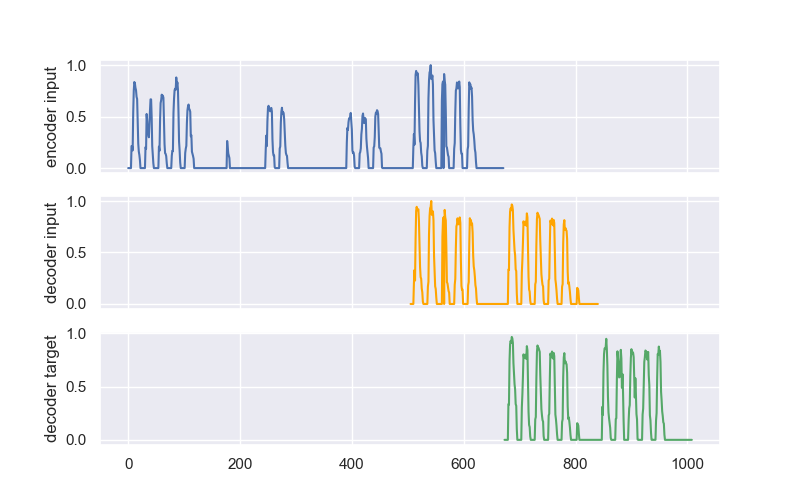

In [31]:
sequence_num = 145

fig, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex=True)

ax1.plot(encoder_input_data[sequence_num])
ax1.set_ylabel('encoder input')

ax2.plot(np.arange(n_input-step_length,n_input-step_length+n_out)+1, decoder_input_data[sequence_num], color='orange')
ax2.set_ylabel('decoder input')

ax3.plot(np.arange(n_input,n_input+n_out)+1, decoder_target_data[sequence_num], color='g')
ax3.set_ylabel('decoder target')

plt.show()

## seq2seq encoder-decoder (from Keras blog)

basic idea is to have a sample long enough for the encoder to learn representation of weeks and days of week (so at least 2 or 3 weeks)

encoder states provide context representation (the 3 weeks before) then decoder uses those states with teacher forcing approach which allows the decoder to learn mapping a temporal step (one hour, one day or one week...) to the next one

this operation iterated over the entire available sequence (for example 1 year of data) allows the network to predict for example one week of data with a "recursive multistep" approach where prediction of one step is used to predict next step and again...

__in the following a basic representation of the encoder-decoder architecture__

<img src="figures/ArturSuilin_encoder-decoder.png">

visit __[this link](https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html)__ and __[this link](https://github.com/JEddy92/TimeSeries_Seq2Seq/blob/master/notebooks/TS_Seq2Seq_Intro.ipynb)__ for more details

In [52]:
name = 'lstm_seq2seq_keras_enc_dec'

plot_path = os.path.join('net_plots', name+'.png')
model_path = os.path.join('best_models', name+'.h5')

dropout_rate = 0.3

backend.clear_session()
model.reset_states()
model.reset_metrics()

# model = load_model(model_path)

first we train the model to predict one step, encoder provides hiddden and cell states of the first LSTM, decoder takes those states as input and learn to predict next step

the important thing here is that we want to reuse optimized layer after training phase to build two new models (one for encoding and another one for decoding) __so we first declare some layers and then we call it for the output__ (check basic of functional keras API for further understanding)

In [53]:
latent_dim = 14 # LSTM hidden units

# Define an input series and encode it with an LSTM. 
encoder_input = Input(shape=(None, 1), name='encoder_input')
encoder_mask_layer = Masking(mask_value=0, name='encoder_mask')(encoder_input)
encoder_output, state_h, state_c = LSTM(latent_dim, return_state=True, name='encoder_LSTM')(encoder_mask_layer)

# We discard `encoder_outputs` and only keep the final states. These represent the "context"
# vector that we use as the basis for decoding.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
# This is where teacher forcing inputs are fed in.
decoder_input = Input(shape=(None, 1), name='decoder_input')
decoder_mask_layer = Masking(mask_value=0, name='decoder_mask')(decoder_input)

# We set up our decoder using `encoder_states` as initial state.
# We return full output sequences and return internal states as well.
# We don't use the return states in the training model, but we will use them in inference.
# vado ad istanziare separatamente i diversi layer per poterli richiamare dopo in fase di inferenza
decoder_lstm_layer = LSTM(latent_dim, return_state=True, return_sequences=True, name='decoder_LSTM')
lstm_output, _, _ = decoder_lstm_layer(decoder_mask_layer, initial_state=encoder_states)

dropout_layer = Dropout(dropout_rate)
dropout_output = dropout_layer(lstm_output, training=True)

time_distributed_layer = TimeDistributed(Dense(1), name='output')
decoder_output = time_distributed_layer(dropout_output)

# Define the model that will turn
# encoder_input_data & decoder_input_data into decoder_target_data
model = Model([encoder_input, decoder_input], decoder_output)

plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
decoder_input (InputLayer)      [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
encoder_mask (Masking)          (None, None, 1)      0           encoder_input[0][0]              
__________________________________________________________________________________________________
decoder_mask (Masking)          (None, None, 1)      0           decoder_input[0][0]              
______________________________________________________________________________________________

In [33]:
print(encoder_input_data.shape)
print(decoder_input_data.shape)
print(decoder_target_data.shape)

(1036, 672, 1)
(1036, 336, 1)
(1036, 336, 1)


In [54]:
# define parameters
# batch for stochastic gradient descent: larger for more accurate but slower optimization
# smaller for faster but less accurate
first_n_samples, epochs, batch_size, verbose = encoder_input_data.shape[0]-86, 20, 24, 2

train_x_enc = encoder_input_data[:first_n_samples]
train_x_dec = decoder_input_data[:first_n_samples]
train_y = decoder_target_data[:first_n_samples]

test_x_enc = encoder_input_data[first_n_samples:]
test_x_dec = decoder_input_data[first_n_samples:]
test_y = decoder_target_data[first_n_samples:]

In [55]:
callback_tensorboard = TensorBoard(log_dir=os.path.join('logs', name), profile_batch=0)
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callback_reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, min_lr=1e-5, min_delta=0.002, patience=5, verbose=1)

callbacks = [callback_tensorboard,callback_model_checkpoint,callback_reduce_lr]

In [56]:
optimizer = Adam(lr=0.01)

model.compile(loss='mse', optimizer=optimizer)

# fit network
history = model.fit([train_x_enc, train_x_dec], train_y, validation_split=0.2, epochs=epochs,
                    batch_size=batch_size, verbose=verbose, callbacks=callbacks, shuffle=False)

Train on 760 samples, validate on 190 samples
Epoch 1/20
760/760 - 65s - loss: 0.0539 - val_loss: 0.0264
Epoch 2/20
760/760 - 26s - loss: 0.0245 - val_loss: 0.0177
Epoch 3/20
760/760 - 26s - loss: 0.0213 - val_loss: 0.0154
Epoch 4/20
760/760 - 27s - loss: 0.0205 - val_loss: 0.0146
Epoch 5/20
760/760 - 27s - loss: 0.0197 - val_loss: 0.0138
Epoch 6/20
760/760 - 27s - loss: 0.0193 - val_loss: 0.0132
Epoch 7/20
760/760 - 27s - loss: 0.0190 - val_loss: 0.0130
Epoch 8/20
760/760 - 27s - loss: 0.0187 - val_loss: 0.0129
Epoch 9/20
760/760 - 28s - loss: 0.0185 - val_loss: 0.0125
Epoch 10/20
760/760 - 27s - loss: 0.0183 - val_loss: 0.0123
Epoch 11/20

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
760/760 - 27s - loss: 0.0182 - val_loss: 0.0123
Epoch 12/20
760/760 - 28s - loss: 0.0173 - val_loss: 0.0111
Epoch 13/20
760/760 - 27s - loss: 0.0169 - val_loss: 0.0109
Epoch 14/20
760/760 - 27s - loss: 0.0169 - val_loss: 0.0109
Epoch 15/20
760/760 - 27s - loss: 0.0169 -

then we reused layers of trained model to build an encoder model and a decoder model separately which can make predictions in a recursive multistep fashion

the first encoder model provides hidden and cell states, the second decoder model takes in input the states from encoder and gives in output the prediction and the states of the decoder itself

this approach has been applied specifically for the recursive multistep prediction, indeed recursive mean that at each step we need not only the values of the prediction to use as the new input but also updated internal states

__in this kind of approach during inference the encoder is used only once to recover the initial states for the first step of the recursion then updated states are provided by the decoder itself__

In [58]:
# from our previous model - mapping encoder sequence to state vectors
encoder_model = Model(encoder_input, encoder_states)

# A modified version of the decoding stage that takes in predicted target inputs
# and encoded state vectors, returning predicted target outputs and decoder state vectors.
# We need to hang onto these state vectors to run the next step of the inference loop.
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

lstm_output, state_h, state_c = decoder_lstm_layer(decoder_mask_layer, initial_state=decoder_states_inputs)
dropout_output = dropout_layer(lstm_output, training=True)
decoder_output = time_distributed_layer(dropout_output)

decoder_states = [state_h, state_c]

decoder_model = Model([decoder_input] + decoder_states_inputs, [decoder_output] + decoder_states)

In [60]:
name = 'lstm_seq2seq_keras_enc'

plot_path = os.path.join('net_plots', 'encoder_decoder', name+'.png')
model_path = os.path.join('best_models', 'encoder_decoder', name+'.h5')

plot_model(encoder_model, show_shapes=True, show_layer_names=True, to_file=plot_path)
encoder_model.save(model_path)

encoder_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, None, 1)]         0         
_________________________________________________________________
encoder_mask (Masking)       (None, None, 1)           0         
_________________________________________________________________
encoder_LSTM (LSTM)          [(None, 14), (None, 14),  896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [61]:
name = 'lstm_seq2seq_keras_dec'

plot_path = os.path.join('net_plots', 'encoder_decoder', name+'.png')
model_path = os.path.join('best_models', 'encoder_decoder', name+'.h5')

plot_model(decoder_model, show_shapes=True, show_layer_names=True, to_file=plot_path)
decoder_model.save(model_path)

decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
decoder_input (InputLayer)      [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
decoder_mask (Masking)          (None, None, 1)      0           decoder_input[0][0]              
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 14)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 14)]         0                                            
____________________________________________________________________________________________

<IPython.core.display.Javascript object>


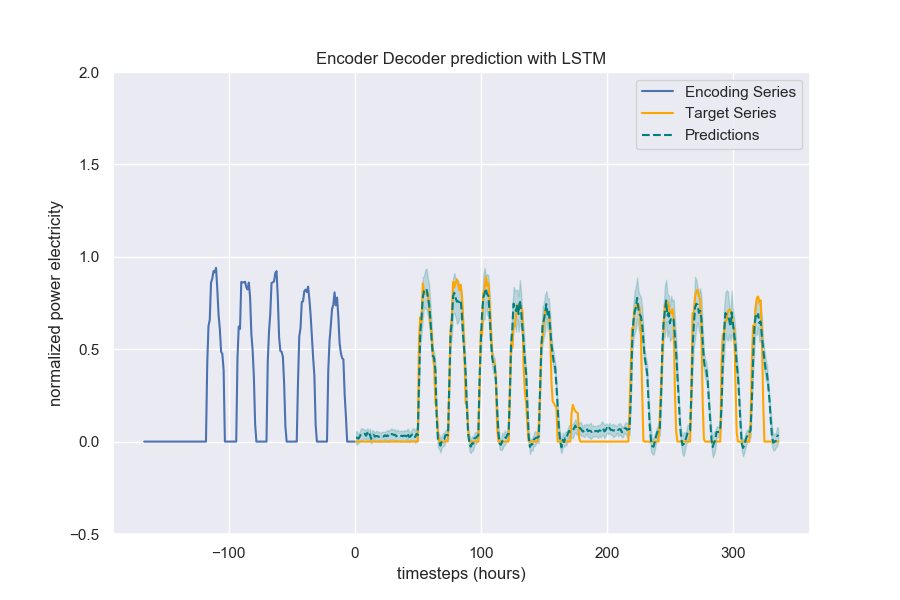

In [99]:
ind = 40
predict_and_plot_enc_dec(encoder_input_data, decoder_target_data, first_n_samples + ind, step_length, pred_steps=dec_pred_steps)

In [82]:
calculate_score_enc_dec(test_x_enc, test_y)


R2 prediction score: 0.823149



## bi-directional encoder-decoder with attention

this architecture contains many complex elements of sequential learning, basically is the same architecture as before (an encoder-decoder) but we added:

1. an attention layer before the encoder to make the context more "focused"
2. a bidirectional wrapper to the encoder in order to take into account for possible inverse dependencies

In [55]:
name = 'lstm_att_bidir_enc_dec'

plot_path = os.path.join('net_plots', name+'.png')
model_path = os.path.join('best_models', name+'.h5')

dropout_rate = 0.3

backend.clear_session()
model.reset_states()
model.reset_metrics()

# model = load_model(model_path)

In [56]:
latent_dim = 14 # LSTM hidden units

# Define an input series and encode it with an LSTM. 
encoder_input = Input(shape=(n_input, 1), name='encoder_input')
encoder_mask_layer = Masking(mask_value=0, name='encoder_mask')(encoder_input)
encoder_attention_layer = Attention()(encoder_mask_layer)
encoder_output, forward_h, forward_c, backward_h, backward_c = Bidirectional(LSTM(latent_dim, return_state=True, name='encoder_LSTM'), merge_mode='ave')(encoder_attention_layer)

state_h = Average()([forward_h, backward_h])
state_c = Average()([forward_c, backward_c])

# We discard `encoder_outputs` and only keep the final states. These represent the "context"
# vector that we use as the basis for decoding.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
# This is where teacher forcing inputs are fed in.
decoder_input = Input(shape=(None, 1), name='decoder_input')
decoder_mask_layer = Masking(mask_value=0, name='decoder_mask')(decoder_input)

# We set up our decoder using `encoder_states` as initial state.
# We return full output sequences and return internal states as well.
# We don't use the return states in the training model, but we will use them in inference.
# vado ad istanziare separatamente i diversi layer per poterli richiamare dopo in fase di inferenza
decoder_lstm_layer = LSTM(latent_dim, return_state=True, return_sequences=True, name='decoder_LSTM')
lstm_output, _, _ = decoder_lstm_layer(decoder_mask_layer, initial_state=encoder_states)

dropout_layer = Dropout(dropout_rate)
dropout_output = dropout_layer(lstm_output, training=True)

time_distributed_layer = TimeDistributed(Dense(1), name='output')
decoder_output = time_distributed_layer(dropout_output)

# Define the model that will turn
# encoder_input_data & decoder_input_data into decoder_target_data
model = Model([encoder_input, decoder_input], decoder_output)

plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 672, 1)]     0                                            
__________________________________________________________________________________________________
encoder_mask (Masking)          (None, 672, 1)       0           encoder_input[0][0]              
__________________________________________________________________________________________________
permute (Permute)               (None, 1, 672)       0           encoder_mask[0][0]               
__________________________________________________________________________________________________
dense (Dense)                   (None, 1, 672)       452256      permute[0][0]                    
______________________________________________________________________________________________

In [115]:
print(encoder_input_data.shape)
print(decoder_input_data.shape)
print(decoder_target_data.shape)

(1036, 672, 1)
(1036, 336, 1)
(1036, 336, 1)


In [57]:
# define parameters
# batch for stochastic gradient descent: larger for more accurate but slower optimization
# smaller for faster but less accurate
first_n_samples, epochs, batch_size, verbose = encoder_input_data.shape[0]-86, 20, 24, 2

train_x_enc = encoder_input_data[:first_n_samples]
train_x_dec = decoder_input_data[:first_n_samples]
train_y = decoder_target_data[:first_n_samples]

test_x_enc = encoder_input_data[first_n_samples:]
test_x_dec = decoder_input_data[first_n_samples:]
test_y = decoder_target_data[first_n_samples:]

In [58]:
callback_tensorboard = TensorBoard(log_dir=os.path.join('logs', name), profile_batch=0)
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callback_reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, min_lr=1e-5, min_delta=0.002, patience=5, verbose=1)

callbacks = [callback_tensorboard,callback_model_checkpoint,callback_reduce_lr]

In [59]:
optimizer = Adam(lr=0.01)

model.compile(loss='mse', optimizer=optimizer)

# fit network
history = model.fit([train_x_enc, train_x_dec], train_y, validation_split=0.2, epochs=epochs,
                    batch_size=batch_size, verbose=verbose, callbacks=callbacks, shuffle=False)

Train on 760 samples, validate on 190 samples
Epoch 1/20
760/760 - 57s - loss: 0.0498 - val_loss: 0.0216
Epoch 2/20
760/760 - 34s - loss: 0.0234 - val_loss: 0.0167
Epoch 3/20
760/760 - 34s - loss: 0.0206 - val_loss: 0.0148
Epoch 4/20
760/760 - 34s - loss: 0.0200 - val_loss: 0.0139
Epoch 5/20
760/760 - 35s - loss: 0.0193 - val_loss: 0.0132
Epoch 6/20
760/760 - 34s - loss: 0.0190 - val_loss: 0.0128
Epoch 7/20
760/760 - 33s - loss: 0.0188 - val_loss: 0.0124
Epoch 8/20
760/760 - 35s - loss: 0.0184 - val_loss: 0.0123
Epoch 9/20
760/760 - 34s - loss: 0.0183 - val_loss: 0.0122
Epoch 10/20
760/760 - 35s - loss: 0.0182 - val_loss: 0.0119
Epoch 11/20
760/760 - 37s - loss: 0.0181 - val_loss: 0.0118
Epoch 12/20
760/760 - 38s - loss: 0.0180 - val_loss: 0.0118
Epoch 13/20

Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
760/760 - 36s - loss: 0.0179 - val_loss: 0.0118
Epoch 14/20
760/760 - 37s - loss: 0.0171 - val_loss: 0.0106
Epoch 15/20
760/760 - 37s - loss: 0.0167 -

In [60]:
# from our previous model - mapping encoder sequence to state vectors
encoder_model = Model(encoder_input, encoder_states)

# A modified version of the decoding stage that takes in predicted target inputs
# and encoded state vectors, returning predicted target outputs and decoder state vectors.
# We need to hang onto these state vectors to run the next step of the inference loop.
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

lstm_output, state_h, state_c = decoder_lstm_layer(decoder_mask_layer, initial_state=decoder_states_inputs)
dropout_output = dropout_layer(lstm_output, training=True)
decoder_output = time_distributed_layer(dropout_output)

decoder_states = [state_h, state_c]

decoder_model = Model([decoder_input] + decoder_states_inputs, [decoder_output] + decoder_states)

In [61]:
name = 'lstm_att_bidir_enc'

plot_path = os.path.join('net_plots', 'encoder_decoder', name+'.png')
model_path = os.path.join('best_models', 'encoder_decoder', name+'.h5')

plot_model(encoder_model, show_shapes=True, show_layer_names=True, to_file=plot_path)
encoder_model.save(model_path)

encoder_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 672, 1)]     0                                            
__________________________________________________________________________________________________
encoder_mask (Masking)          (None, 672, 1)       0           encoder_input[0][0]              
__________________________________________________________________________________________________
permute (Permute)               (None, 1, 672)       0           encoder_mask[0][0]               
__________________________________________________________________________________________________
dense (Dense)                   (None, 1, 672)       452256      permute[0][0]                    
____________________________________________________________________________________________

In [62]:
name = 'lstm_att_bidir_dec'

plot_path = os.path.join('net_plots', 'encoder_decoder', name+'.png')
model_path = os.path.join('best_models', 'encoder_decoder', name+'.h5')

plot_model(decoder_model, show_shapes=True, show_layer_names=True, to_file=plot_path)
decoder_model.save(model_path)

decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
decoder_input (InputLayer)      [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
decoder_mask (Masking)          (None, None, 1)      0           decoder_input[0][0]              
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 14)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 14)]         0                                            
____________________________________________________________________________________________

<IPython.core.display.Javascript object>


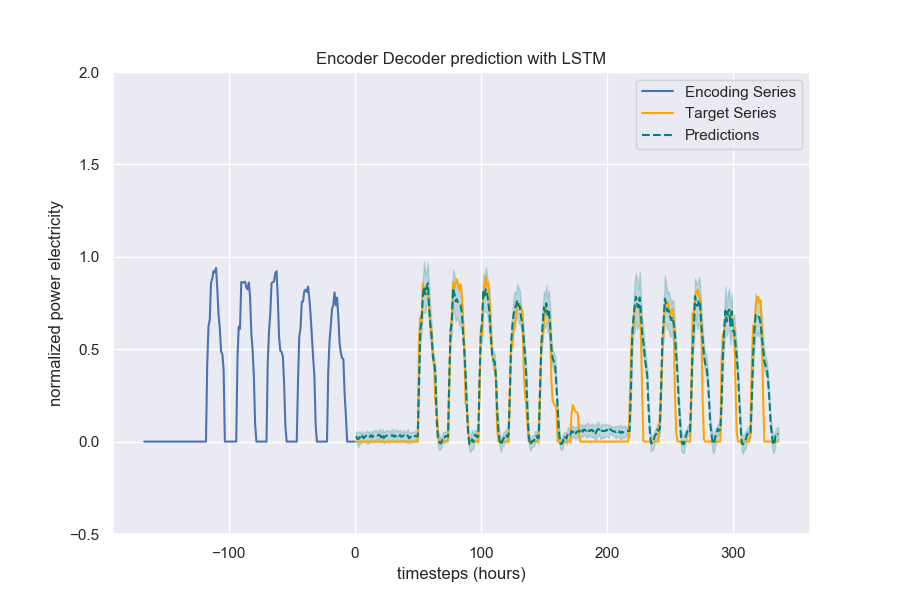

In [63]:
ind = 40
predict_and_plot_enc_dec(encoder_input_data, decoder_target_data, first_n_samples + ind, step_length, pred_steps=dec_pred_steps)

In [64]:
calculate_score_enc_dec(test_x_enc, test_y)


R2 prediction score: 0.822783



## _definitions and data prep - TCN_

In [65]:
n_input = 24*7*4

# distance between adjacent sample
shift_step = 2

# length of prediction
step_length = 24*7

# length to show to the network for teacher forcing
steps_to_teach = 24*7

n_out = steps_to_teach + step_length

# sample creation for supervised approach
input_data, target_data = convert_timeseries_to_samples(dataset, n_input, n_out, shift_step, steps_to_teach)

# data scaling
scaler_list = []
for i in range(input_data.shape[0]):
    scaler = MinMaxScaler().fit(input_data[i])
    input_data[i] = scaler.transform(input_data[i])
    target_data[i] = scaler.transform(target_data[i])
    scaler_list.append(scaler)

# missing value replacement
missing_value = 0
input_data[np.isnan(input_data)] = missing_value
target_data[np.isnan(target_data)] = missing_value

print(input_data.shape)
print(target_data.shape)

(1286, 672, 1)
(1286, 336, 1)


<IPython.core.display.Javascript object>


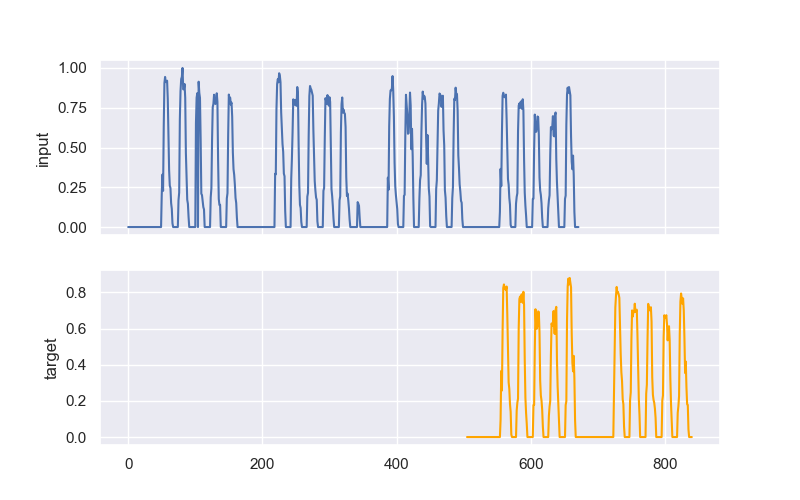

In [66]:
sequence_num = 375

fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)

ax1.plot(input_data[sequence_num])
ax1.set_ylabel('input')

ax2.plot(np.arange(n_input-steps_to_teach,n_input-steps_to_teach+n_out)+1, target_data[sequence_num], color='orange')
ax2.set_ylabel('target')

plt.show()

## dilated causal CNN (TCN without residual block)

after encoder-decoder architecture we want to focus on a powerful emerging technique involving convolutional neural network

the technique is referred to as dilated convolution, it involves multiple convolutional layers with kernel dilated in exponentially increasing order

this particular technique allows to preserve a connection between past and present data and to "memorize" very long sequences but at the sime time overall number of parameters is kept low, so the final result is a big capacity but with less parameters and then faster optimizations

also in this case the teacher forcing approach has been used with a step of 1 week

__basic functionality of dilated convolution can be understood from this picture__

<img src="figures/wave_net_principle.gif">

visit __[this link](https://github.com/JEddy92/TimeSeries_Seq2Seq/blob/master/notebooks/TS_Seq2Seq_Conv_Intro.ipynb)__ for more details

In [75]:
print(input_data.shape)
print(target_data.shape)

(1286, 672, 1)
(1286, 336, 1)


In [76]:
# define parameters
# batch for stochastic gradient descent: larger for more accurate but slower optimization
# smaller for faster but less accurate
first_n_samples, epochs, batch_size, verbose = input_data.shape[0]-86, 80, 84, 2

train_x = input_data[:first_n_samples]
train_y = target_data.reshape(-1,n_out)[:first_n_samples]

test_x = input_data[first_n_samples:]
test_y = target_data.reshape(-1,n_out)[first_n_samples:]

In [79]:
name = 'dilated_cnn'

plot_path = os.path.join('net_plots', name+'.png')
model_path = os.path.join('best_models', name+'.h5')

dropout_rate = 0.3

backend.clear_session()
model.reset_states()
model.reset_metrics()

# model = load_model(model_path)

receptive field of the network is given by the filter width multiplied the max dilation therefore the max dilation required for the input length is obtained from the formula n\_input / filter\_width

In [80]:
# convolutional layer parameters
n_filters = 32
filter_width = 2

max_dilation = n_input/filter_width
max_dilation = int(np.log2(max_dilation))
dilation_rates = [2**i for i in range(max_dilation)]

# define an input history series and pass it through a stack of dilated causal convolutions. 
history_seq = Input(shape=(None, 1))

x = history_seq

for dilation_rate in dilation_rates:
    x = Conv1D(filters=n_filters,
               kernel_size=filter_width, 
               padding='causal',
               dilation_rate=dilation_rate)(x)
    x = Dropout(dropout_rate)(x, training=True)

x = Dense(128, activation='relu')(x)

x = Dropout(dropout_rate)(x, training=True)
x = Dense(1)(x)

# extract the last n_out time steps as the training target
def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':n_out})(x)

model = Model(history_seq, pred_seq_train)

plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 32)          96        
_________________________________________________________________
dropout (Dropout)            (None, None, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 32)          0     

In [81]:
callback_tensorboard = TensorBoard(log_dir=os.path.join('logs', name), profile_batch=0)
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callback_reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, min_lr=1e-5, min_delta=0.002, patience=10, verbose=1)

callbacks = [callback_tensorboard,callback_model_checkpoint,callback_reduce_lr]

In [82]:
optimizer = Adam(lr=0.001)

model.compile(loss='mse', optimizer=optimizer)

# fit network
history = model.fit(train_x, train_y, validation_split=0.2, epochs=epochs, batch_size=batch_size,
                    verbose=verbose, callbacks=callbacks, shuffle=False)

Train on 960 samples, validate on 240 samples
Epoch 1/80
960/960 - 10s - loss: 0.1130 - val_loss: 0.0926
Epoch 2/80
960/960 - 7s - loss: 0.0731 - val_loss: 0.0682
Epoch 3/80
960/960 - 8s - loss: 0.0592 - val_loss: 0.0542
Epoch 4/80
960/960 - 8s - loss: 0.0531 - val_loss: 0.0447
Epoch 5/80
960/960 - 8s - loss: 0.0468 - val_loss: 0.0412
Epoch 6/80
960/960 - 8s - loss: 0.0440 - val_loss: 0.0398
Epoch 7/80
960/960 - 8s - loss: 0.0427 - val_loss: 0.0375
Epoch 8/80
960/960 - 8s - loss: 0.0414 - val_loss: 0.0352
Epoch 9/80
960/960 - 8s - loss: 0.0396 - val_loss: 0.0338
Epoch 10/80
960/960 - 8s - loss: 0.0386 - val_loss: 0.0328
Epoch 11/80
960/960 - 8s - loss: 0.0377 - val_loss: 0.0315
Epoch 12/80
960/960 - 8s - loss: 0.0371 - val_loss: 0.0301
Epoch 13/80
960/960 - 8s - loss: 0.0361 - val_loss: 0.0283
Epoch 14/80
960/960 - 8s - loss: 0.0350 - val_loss: 0.0279
Epoch 15/80
960/960 - 8s - loss: 0.0345 - val_loss: 0.0272
Epoch 16/80
960/960 - 8s - loss: 0.0341 - val_loss: 0.0267
Epoch 17/80
960/96

In [83]:
model = load_model(model_path)

<IPython.core.display.Javascript object>


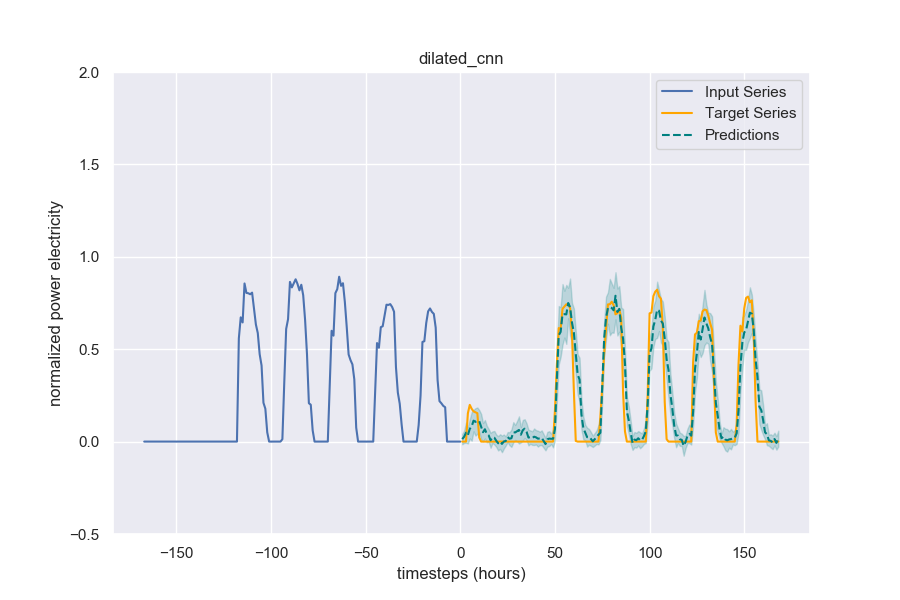

In [89]:
ind = 40
predict_and_plot(input_data, target_data, first_n_samples + ind, step_length)

In [87]:
calculate_score(test_x, test_y)


R2 prediction score: 0.762686



In [88]:
model.evaluate(test_x, test_y, batch_size=batch_size)

86/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.02128377296896868

## Temporal Convolutional Network (TCN)

this last architecture represents currently one of the best approaches to sequence modeling that can be applied to time series prediction

it is computationally less expensive, faster and with generally better performances with respect to other recurrent neural network

the core element is still a dilated convolutional network but there is also a residual block which takes the output of the stacked dilated cnn and add it to the input to obtain the final output

again teacher forcing has been used to train the network

__basic elements fo a temporal convolutional network architecture__

<img src="figures/tcn_basic_elements.png">

visit __[this link](https://github.com/philipperemy/keras-tcn)__ or __[this link](https://medium.com/the-artificial-impostor/notes-understanding-tensorflow-part-3-7f6633fcc7c7)__ for more details

### definitions

In [98]:
import tensorflow.keras.backend as K
import tensorflow.keras.layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.layers import Activation, Lambda
from tensorflow.keras.layers import Conv1D, SpatialDropout1D
from tensorflow.keras.layers import Convolution1D, Dense
from tensorflow.keras.models import Model
from typing import List, Tuple

def channel_normalization(x):
    # type: (Layer) -> Layer
    """ Normalize a layer to the maximum activation

    This keeps a layers values between zero and one.
    It helps with relu's unbounded activation

    Args:
        x: The layer to normalize

    Returns:
        A maximal normalized layer
    """
    max_values = K.max(K.abs(x), 2, keepdims=True) + 1e-5
    out = x / max_values
    return out

def wave_net_activation(x):
    # type: (Layer) -> Layer
    """This method defines the activation used for WaveNet

    described in https://deepmind.com/blog/wavenet-generative-model-raw-audio/

    Args:
        x: The layer we want to apply the activation to

    Returns:
        A new layer with the wavenet activation applied
    """
    tanh_out = Activation('tanh')(x)
    sigm_out = Activation('sigmoid')(x)
    return tensorflow.keras.layers.multiply([tanh_out, sigm_out])

def residual_block(x, s, i, activation, nb_filters, kernel_size, padding, dropout_rate=0, name=''):
    # type: (Layer, int, int, str, int, int, str, float, str) -> Tuple[Layer, Layer]
    """Defines the residual block for the WaveNet TCN

    Args:
        x: The previous layer in the model
        s: The stack index i.e. which stack in the overall TCN
        i: The dilation power of 2 we are using for this residual block
        activation: The name of the type of activation to use
        nb_filters: The number of convolutional filters to use in this block
        kernel_size: The size of the convolutional kernel
        padding: The padding used in the convolutional layers, 'same' or 'causal'.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A tuple where the first element is the residual model layer, and the second
        is the skip connection.
    """

    original_x = x
    conv = Conv1D(filters=nb_filters, kernel_size=kernel_size,
                  dilation_rate=i, padding=padding,
                  name=name + '_d_%s_conv_%d_tanh_s%d' % (padding, i, s))(x)
    if activation == 'norm_relu':
        x = Activation('relu')(conv)
        x = Lambda(channel_normalization)(x)
    elif activation == 'wavenet':
        x = wave_net_activation(conv)
    else:
        x = Activation(activation)(conv)

    x = SpatialDropout1D(dropout_rate, name=name + '_spatial_dropout1d_%d_s%d_%f' % (i, s, dropout_rate))(x, training=True)

    # 1x1 conv.
    x = Convolution1D(nb_filters, 1, padding='same')(x)
    res_x = tensorflow.keras.layers.add([original_x, x])
    return res_x, x

def process_dilations(dilations):
    def is_power_of_two(num):
        return num != 0 and ((num & (num - 1)) == 0)

    if all([is_power_of_two(i) for i in dilations]):
        return dilations

    else:
        new_dilations = [2 ** i for i in dilations]
        # print(f'Updated dilations from {dilations} to {new_dilations} because of backwards compatibility.')
        return new_dilations

class TCN:
    """Creates a TCN layer.

    Input shape:
        A tensor of shape (batch_size, timesteps, input_dim).

    Args:
        nb_filters: The number of filters to use in the convolutional layers.
        kernel_size: The size of the kernel to use in each convolutional layer.
        dilations: The list of the dilations. Example is: [1, 2, 4, 8, 16, 32, 64].
        nb_stacks : The number of stacks of residual blocks to use.
        activation: The activations to use (norm_relu, wavenet, relu...).
        padding: The padding to use in the convolutional layers, 'causal' or 'same'.
        use_skip_connections: Boolean. If we want to add skip connections from input to each residual block.
        return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.
        dropout_rate: Float between 0 and 1. Fraction of the input units to drop.
        name: Name of the model. Useful when having multiple TCN.

    Returns:
        A TCN layer.
    """

    def __init__(self,
                 nb_filters=64,
                 kernel_size=2,
                 nb_stacks=1,
                 dilations=[1, 2, 4, 8, 16, 32],
                 activation='norm_relu',
                 padding='causal',
                 use_skip_connections=True,
                 dropout_rate=0.0,
                 return_sequences=True,
                 name='tcn'):
        self.name = name
        self.return_sequences = return_sequences
        self.dropout_rate = dropout_rate
        self.use_skip_connections = use_skip_connections
        self.activation = activation
        self.dilations = dilations
        self.nb_stacks = nb_stacks
        self.kernel_size = kernel_size
        self.nb_filters = nb_filters
        self.padding = padding

        if padding != 'causal' and padding != 'same':
            raise ValueError("Only 'causal' or 'same' padding are compatible for this layer.")

        if not isinstance(nb_filters, int):
            print('An interface change occurred after the version 2.1.2.')
            print('Before: tcn.TCN(i, return_sequences=False, ...)')
            print('Now should be: tcn.TCN(return_sequences=False, ...)(i)')
            print('Second solution is to pip install keras-tcn==2.1.2 to downgrade.')
            raise Exception()

    def __call__(self, inputs):
        x = inputs
        x = Convolution1D(self.nb_filters, 1, padding=self.padding, name=self.name + '_initial_conv')(x)
        skip_connections = []
        for s in range(self.nb_stacks):
            for i in self.dilations:
                x, skip_out = residual_block(x, s, i,
                                             self.activation, self.nb_filters, self.kernel_size,
                                             self.padding, self.dropout_rate, name=self.name)
                skip_connections.append(skip_out)
        if self.use_skip_connections:
            x = tensorflow.keras.layers.add(skip_connections)
        x = Activation('relu')(x)
        
        x = Dropout(self.dropout_rate)(x, training=True)
        x = Dense(128, activation='relu')(x)
        x = Dropout(self.dropout_rate)(x, training=True)
        x = Dense(1)(x)

        if not self.return_sequences:
            output_slice_index = -n_out
            x = Lambda(lambda tt: tt[:, output_slice_index:, :])(x)
        return x

### model

In [106]:
print(input_data.shape)
print(target_data.shape)

(1286, 672, 1)
(1286, 336, 1)


In [107]:
# define parameters
# batch for stochastic gradient descent: larger for more accurate but slower optimization
# smaller for faster but less accurate
first_n_samples, epochs, batch_size, verbose = input_data.shape[0]-86, 40, 84, 2

train_x = input_data[:first_n_samples]
train_y = target_data.reshape(-1,n_out)[:first_n_samples]

test_x = input_data[first_n_samples:]
test_y = target_data.reshape(-1,n_out)[first_n_samples:]

In [110]:
name = 'temporal_cnn_3_stack'

plot_path = os.path.join('net_plots', name+'.png')
model_path = os.path.join('best_models', name+'.h5')

dropout_rate = 0.3

backend.clear_session()
model.reset_states()
model.reset_metrics()

# model = load_model(model_path)

In [111]:
input_len = None
num_feat = 1

n_filters = 32
filter_width = 2
nb_stacks = 3

max_dilation = n_input/filter_width/nb_stacks
max_dilation = int(np.log2(max_dilation))
dilation_rates = [2**i for i in range(max_dilation)]

dilation_rates = process_dilations(dilation_rates)

input_layer = Input(shape=(input_len, num_feat))

output_layer = TCN(
    return_sequences=False,
    dilations=dilation_rates,
    nb_filters=n_filters,
    kernel_size=filter_width,
    nb_stacks=nb_stacks,
    use_skip_connections=True,
    activation='wavenet',
    dropout_rate=dropout_rate,
    name='TCN'
)(input_layer)

# a second TCN could be stacked to the first...
# output_layer = TCN(return_sequences=False, name='TCN_2')(x)

print('x.shape=', x.shape)

print(f'model.x = {input_layer.shape}')
print(f'model.y = {output_layer.shape}')

model = Model(input_layer, output_layer)

plot_model(model, show_shapes=True, show_layer_names=True, to_file=plot_path)

model.summary()

x.shape= (None, None, 1)
model.x = (None, None, 1)
model.y = (None, None, 1)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 1)]    0                                            
__________________________________________________________________________________________________
TCN_initial_conv (Conv1D)       (None, None, 32)     64          input_1[0][0]                    
__________________________________________________________________________________________________
TCN_d_causal_conv_1_tanh_s0 (Co (None, None, 32)     2080        TCN_initial_conv[0][0]           
__________________________________________________________________________________________________
activation (Activation)         (None, None, 32)     0           TCN_d_causal_conv_1_tanh_s0[0][0]
_________________

In [112]:
callback_tensorboard = TensorBoard(log_dir=os.path.join('logs', name), profile_batch=0)
callback_model_checkpoint = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
callback_reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, min_lr=1e-5, min_delta=0.002, patience=10, verbose=1)

callbacks = [callback_tensorboard,callback_model_checkpoint,callback_reduce_lr]

In [113]:
optimizer = Adam(lr=0.001)

model.compile(loss='mse', optimizer=optimizer)

# fit network
history = model.fit(train_x, train_y, validation_split=0.2, epochs=epochs, batch_size=batch_size,
                    verbose=verbose, callbacks=callbacks, shuffle=False)

Train on 960 samples, validate on 240 samples
Epoch 1/40
960/960 - 33s - loss: 0.1144 - val_loss: 0.0688
Epoch 2/40
960/960 - 22s - loss: 0.0542 - val_loss: 0.0481
Epoch 3/40
960/960 - 22s - loss: 0.0448 - val_loss: 0.0459
Epoch 4/40
960/960 - 23s - loss: 0.0417 - val_loss: 0.0392
Epoch 5/40
960/960 - 22s - loss: 0.0402 - val_loss: 0.0301
Epoch 6/40
960/960 - 22s - loss: 0.0371 - val_loss: 0.0256
Epoch 7/40
960/960 - 22s - loss: 0.0345 - val_loss: 0.0238
Epoch 8/40
960/960 - 20s - loss: 0.0326 - val_loss: 0.0220
Epoch 9/40
960/960 - 21s - loss: 0.0317 - val_loss: 0.0229
Epoch 10/40
960/960 - 20s - loss: 0.0322 - val_loss: 0.0212
Epoch 11/40
960/960 - 21s - loss: 0.0311 - val_loss: 0.0186
Epoch 12/40
960/960 - 21s - loss: 0.0297 - val_loss: 0.0181
Epoch 13/40
960/960 - 20s - loss: 0.0292 - val_loss: 0.0188
Epoch 14/40
960/960 - 20s - loss: 0.0289 - val_loss: 0.0182
Epoch 15/40
960/960 - 21s - loss: 0.0285 - val_loss: 0.0174
Epoch 16/40
960/960 - 21s - loss: 0.0281 - val_loss: 0.0167
Epo

In [114]:
model = load_model(model_path)

<IPython.core.display.Javascript object>


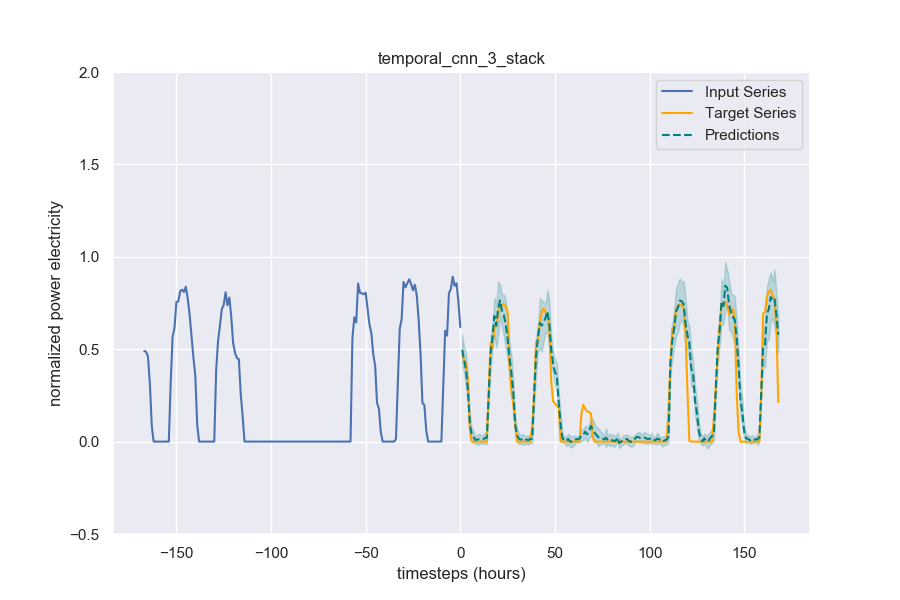

In [115]:
ind = 10
predict_and_plot(input_data, target_data, first_n_samples + ind, step_length)

In [116]:
calculate_score(test_x, test_y)


R2 prediction score: 0.758972



In [117]:
model.evaluate(test_x, test_y, batch_size=batch_size)

86/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.017947365378224573

## N-Beats (Neural Basis Expansion) WIP

## Transformer (GPT/BERT) WIP

# Neural Networks (multivariate) WIP

# Machine Learning WIP

__feature engineering__ + __ML (random forest, xgboost, lightGBM....)__

to be continued....